# 🚢 TITANIC 공유 질문

1. 프로젝트를 진행하면서 가장 어려웠던 점은 무엇이었고, 그것을 어떻게 해결했나요?

    -> 전처리 과정에서 여러 옵션 중 어떤 것을 선택하는 것이 적절한지를 고민하는 시간이 길었다. 명확한 개념 및 근거를 공부하며 분석을 진행하였다.

2. 시간이 더 있었다면 어떤 노력을 더 해봤을 것 같나요?

    -> 캐글에 공유된 여러 코드를 보며 성능 개선을 해봤을 것 같다.

3. 모델의 성능을 높이기 위하여 시도한 부분에 대해 설명해주세요.  

    -> 파생변수를 만들어 모델의 정확도를 높이고자 하였다. 다양한 모델을 사용하여 성능을 비교하였고, 성능이 가장 좋은 모델에 대해 하이퍼파라미터 튜닝을 진행했다.

4. 결과가 어땠나요? 그리고 왜 그런 결과가 나왔다고 생각하시나요?

    -> 캐글 public score 0.77033이 나왔다. 추가적인 피처 엔지니어링이나 새로운 모델 선정이 필요할 것 같다.

# 데이터 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/result/submission.csv')

# 데이터 파악

**변수 설명**
- PassengerId
- Surived: 0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- Name: 승객 이름
- Sex: male=남성, female=여성
- Age: 나이(1세 미만(영아)이면 소수점으로, 나이가 추정되었으면 xx.5 형태로 표시)
- SibSp: 타이타닉 호에 동승한 형제자매/배우자의 수(정부(mistresses)와 약혼자(fiancés)는 미포함)
- Parch: 타이타닉 호에 동승한 부모/자식의 수(일부 어린이는 유모와 함께 여행했으므로 parch=0으로 표시)
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지: C=셰르부르, Q=퀸즈타운, S=사우샘프턴

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print(train.info())
print('---')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1  

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
print(train.isnull().sum())
print('---')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
pclass_value = train['Pclass'].value_counts()
pclass_value

,count
Pclass,
3,491
1,216
2,184


# EDA

<Axes: ylabel='count'>

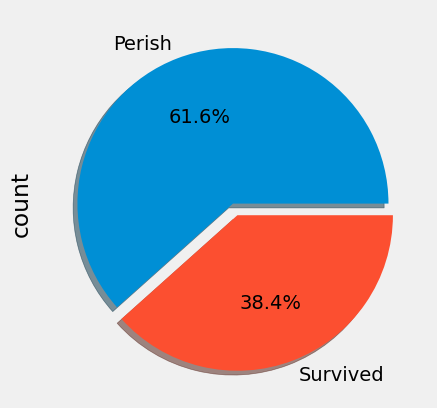

In [ ]:
# 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
labels = ['Perish', 'Survived']
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0, 0.08], labels=labels)

<Axes: xlabel='Embarked', ylabel='count'>

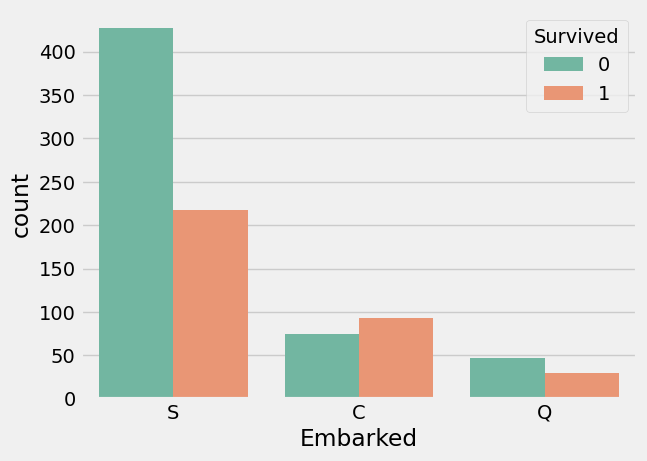

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=train, palette='Set2')
# 승선지별 생존자 & 사망자 수

<Axes: xlabel='Embarked', ylabel='Survived'>

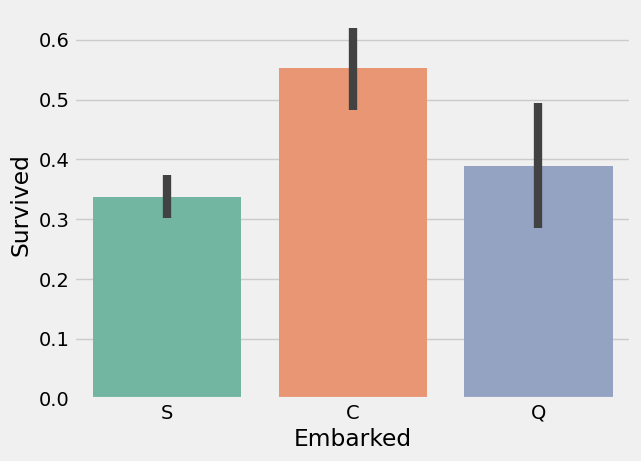

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train, palette='Set2')
# 셰르부르에서 승선한 사람의 생존율이 유의미하게 높다->셰르부르 탑승자의 다른 특징을 살펴보자.

<Axes: xlabel='Embarked', ylabel='Fare'>

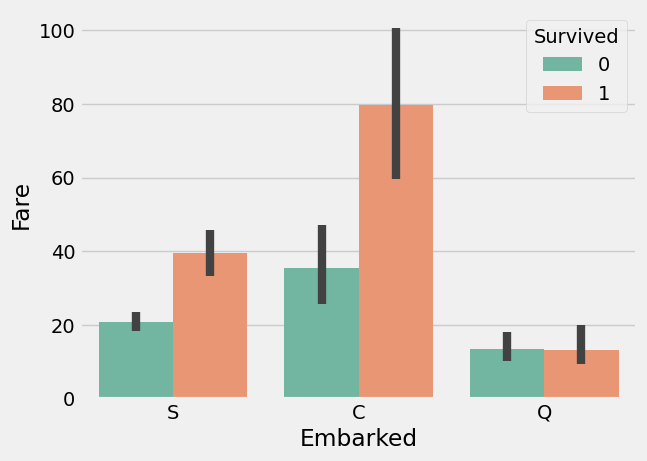

In [ ]:
sns.barplot(x='Embarked', y='Fare', hue='Survived', data=train, palette='Set2')
# 셰르부르에서 승선한 사람들의 평균 요금이 높다. -> 해당 도시의 특성?
# 퀸즈타운의 요금이 낮은 건 다른 두 도시에 비해 늦게 승선한 영향도 있지 않을까?

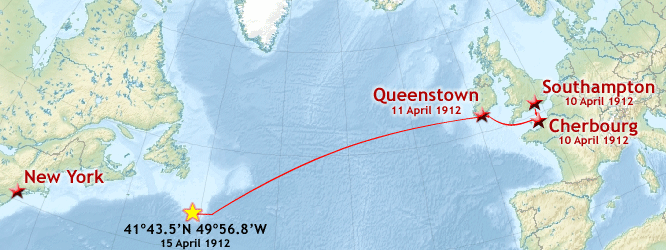

<Axes: xlabel='Embarked', ylabel='count'>

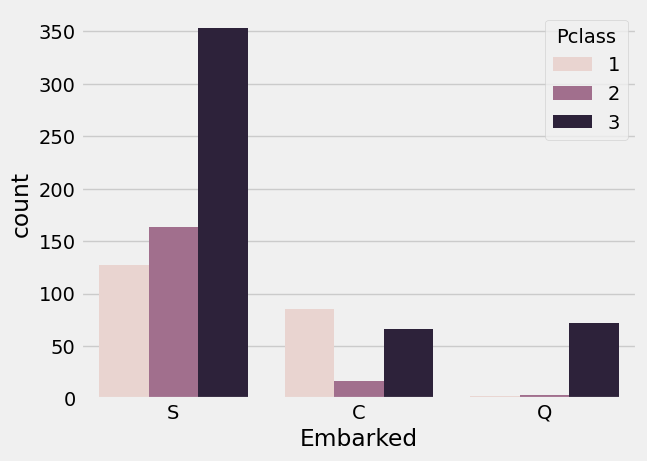

In [ ]:
sns.countplot(x='Embarked', hue='Pclass', data=train)
# 사우샘프턴, 퀸즈타운에서는 3등급 객실 고객이 가장 많이, 셰르부르에서는 1등급 객실 고객이 가장 많이 승선

<Axes: xlabel='Pclass', ylabel='count'>

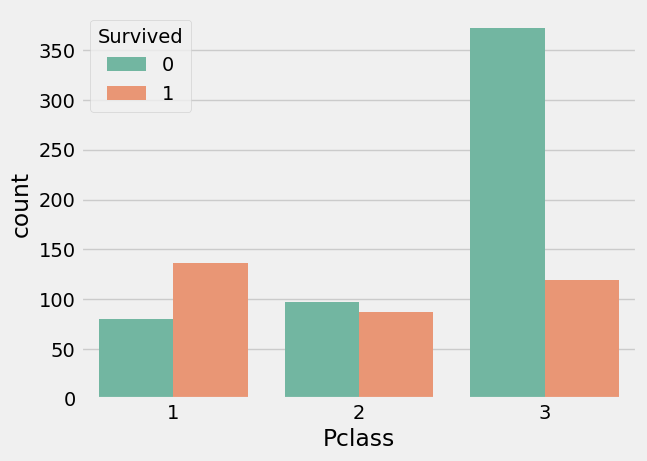

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set2')
# 높은 등급의 객실 고객이 생존율이 높다.

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Survived')]

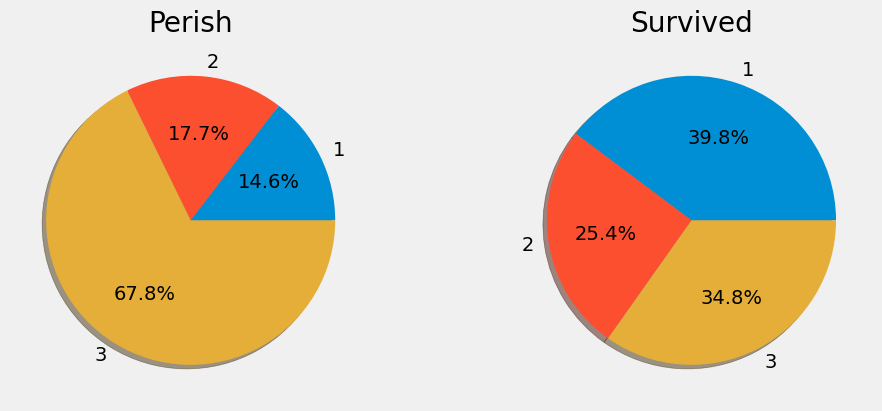

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4), constrained_layout=True)

# Survived = 0
train[train['Survived'] == 0]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set(ylabel='', title='Perish')

# Survived = 1
train[train['Survived'] == 1]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%')
ax[1].set(ylabel='', title='Survived')

<Axes: xlabel='Sex', ylabel='count'>

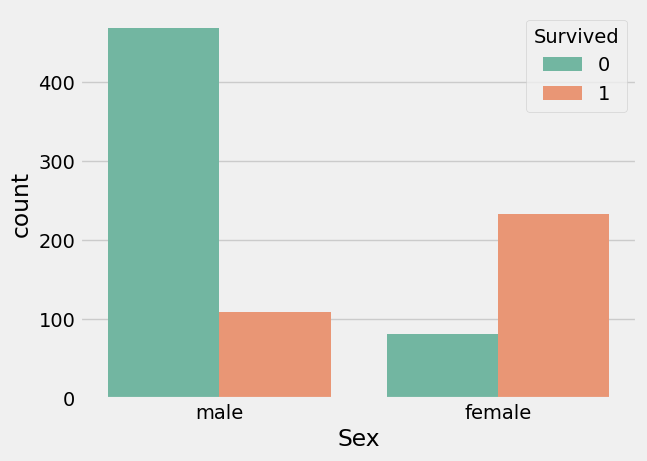

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set2')
# 남성은 사망자가, 여성은 생존자가 더 많다.

<Axes: xlabel='Pclass', ylabel='Survived'>

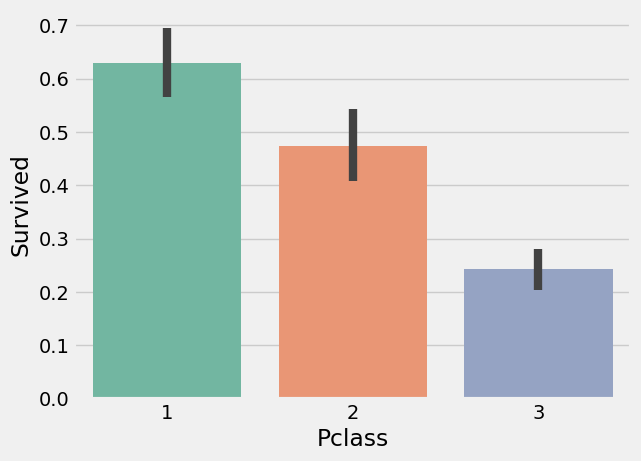

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train, palette='Set2')
# 객실 등급별 생존율

<Axes: xlabel='SibSp', ylabel='Survived'>

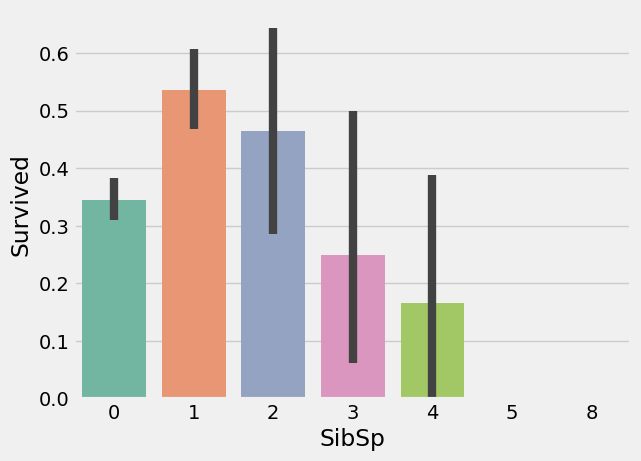

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=train, palette='Set2')

In [ ]:
train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='Parch', ylabel='Survived'>

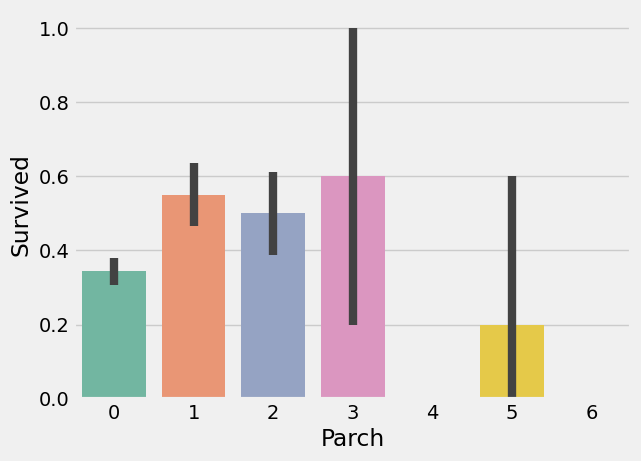

In [ ]:
sns.barplot(x='Parch', y='Survived', data=train, palette='Set2')

In [ ]:
train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


SibSp와 Parch는 합치는 것이 더 의미 있을 것 같다.

<Axes: xlabel='Age', ylabel='Density'>

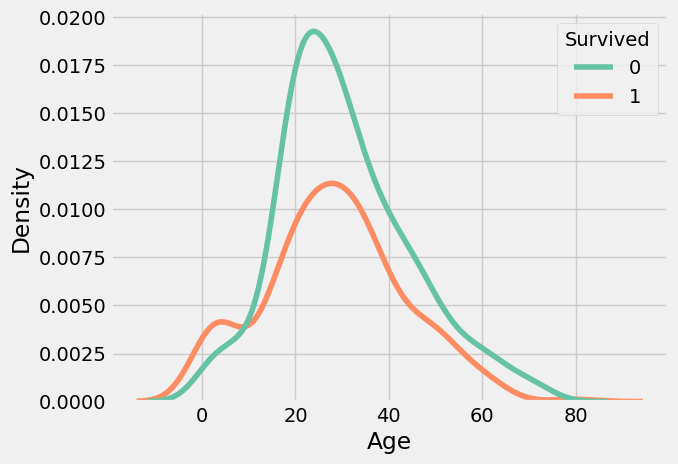

In [ ]:
sns.kdeplot(x='Age', data=train, hue='Survived', palette='Set2')

<Axes: xlabel='Fare', ylabel='Density'>

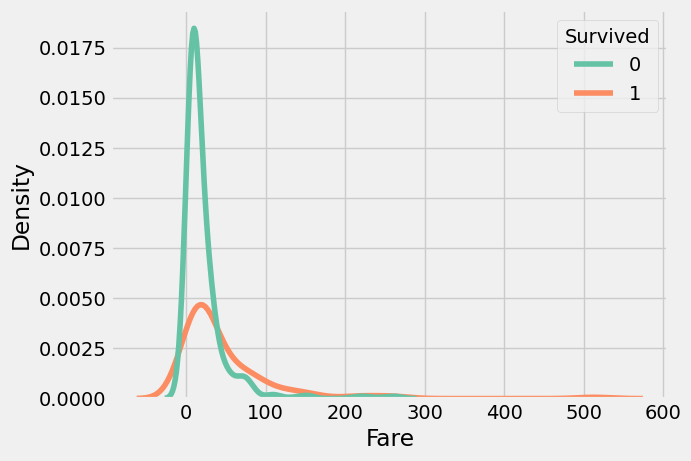

In [ ]:
sns.kdeplot(x='Fare', data=train, hue='Survived', palette='Set2')

<Axes: ylabel='Fare'>

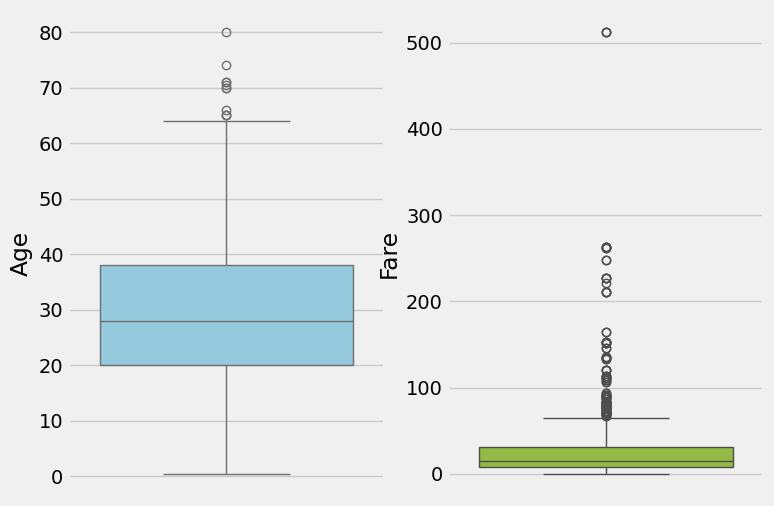

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(ax=axes[0], y=train['Age'], color='skyblue')
sns.boxplot(ax=axes[1], y=train['Fare'], color='yellowgreen')
# 이상치 추후 제거

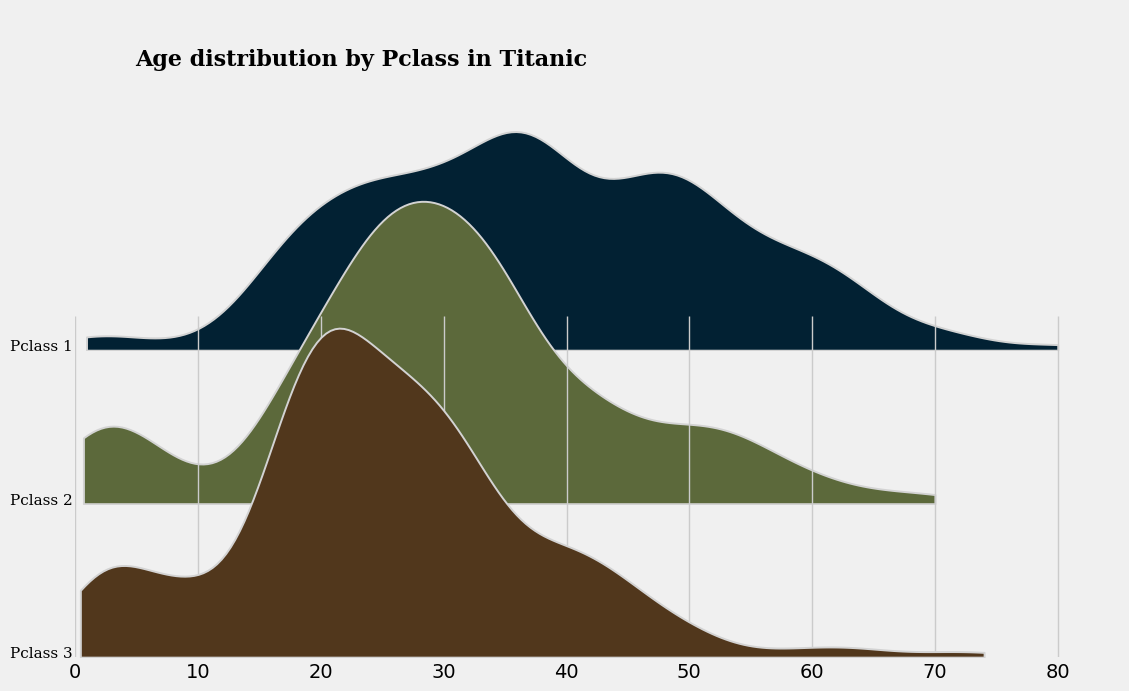

In [13]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=train[train['Pclass']==cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray',color=c, alpha=1)

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

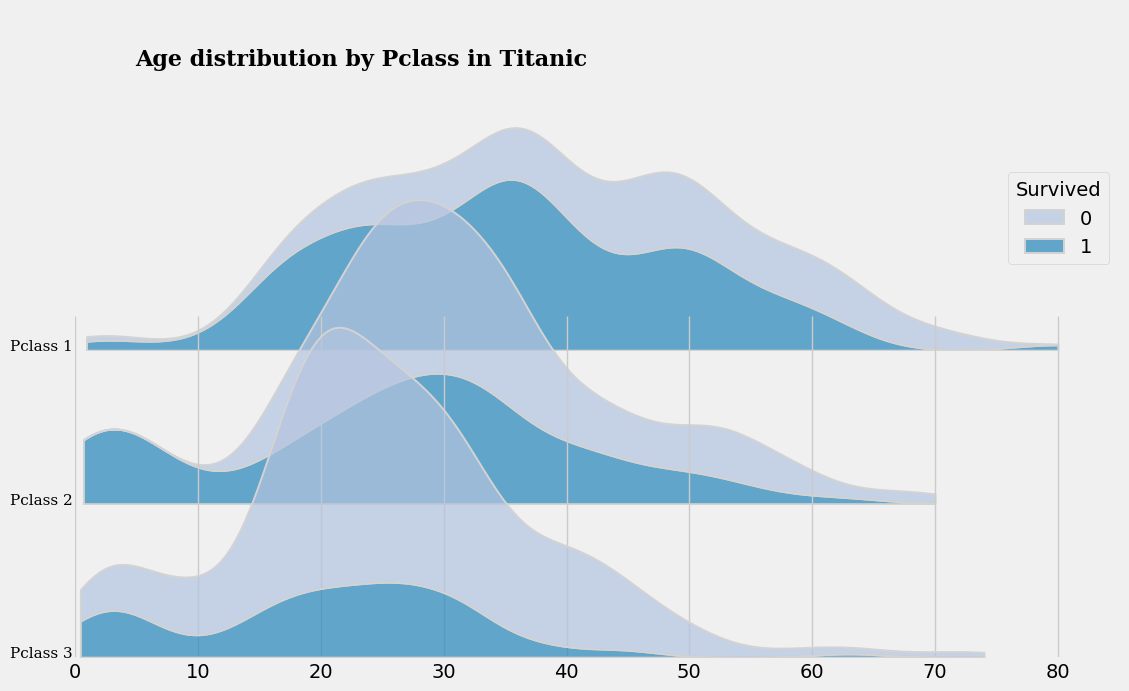

In [14]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=train[train['Pclass']==cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray', hue='Survived',
                multiple="stack", palette='PuBu', alpha=0.7
               )

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()

PClass는 유의해보이므로, 검정해도 좋아보입니다. (클래스가 높아질수록 살아남을 확률이 높아 보입니다.)

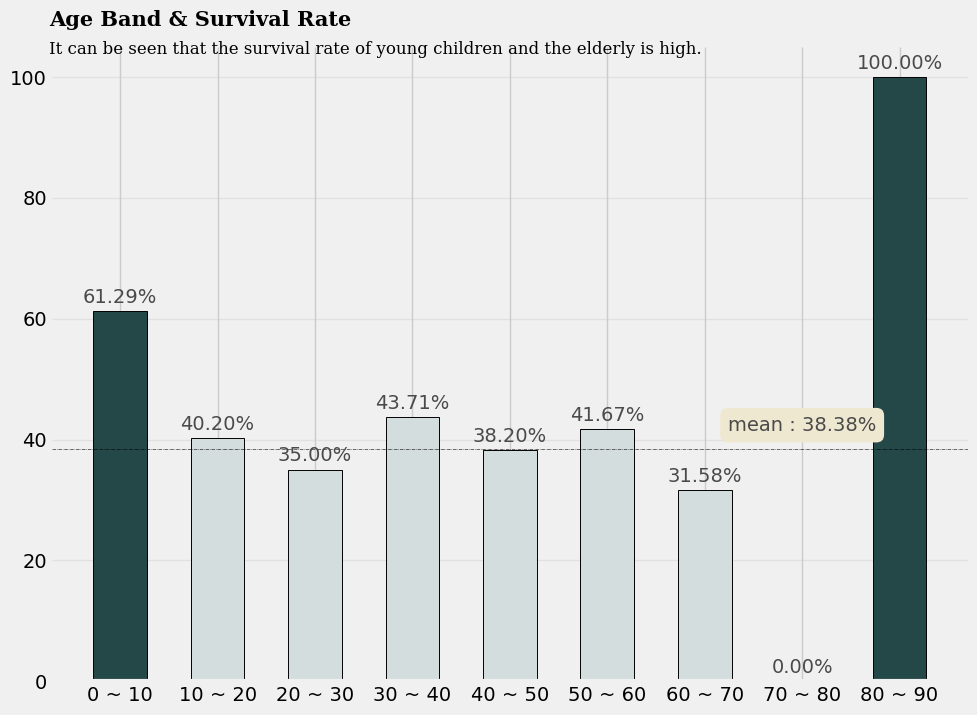

In [15]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['age_band'] = train['Age'].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'],
       color=color_map, width=0.55,
       edgecolor='black',
       linewidth=0.7)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%",
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light',
                   color='#4a4a4a')


# mean line + annotation
mean = train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%",
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))


# Title & Subtitle
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

나이 또한 유의해보이므로, 검정해도 좋아보입니다.

In [16]:
survival_rate = train.groupby(['Sex'])['Survived'].mean()
survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(train[(train['Sex']=='male') & (train['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(train[(train['Sex']=='male') & (train['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(train[(train['Sex']=='female') & (train['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(train[(train['Sex']=='female') & (train['Survived']==0)]))

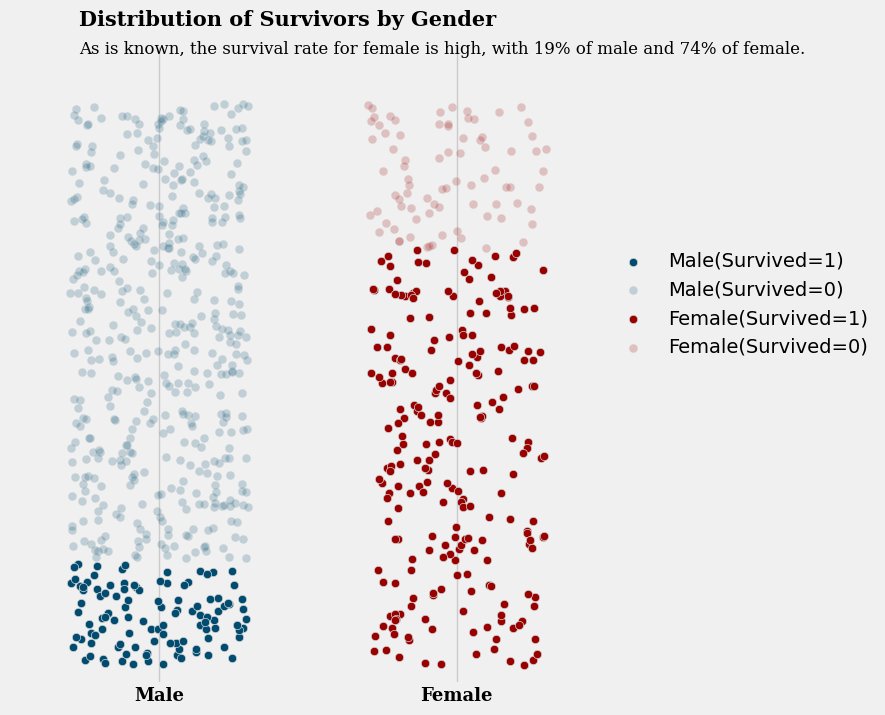

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()


성별은 유의해보이므로 검정해도 좋아보입니다.

SibSp, Parch, Fare을 포함한 값들에 대해서도 EDA를 진행하고, 가설 검정의 가치가 있는지를 파악하면 좋습니다.
통계적 검증 방법론을 사용하여 숫자로만 보는 것이 항상 옳지는 않습니다.

In [19]:
train = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/result/submission.csv')

# 통계적 검증에 대하여

가장 많이 사용하시는 corr() 메소드, 즉 피어슨 상관계수입니다.
그러나 피어슨 상관계수가 모든 데이터에 효과적이진 않습니다.

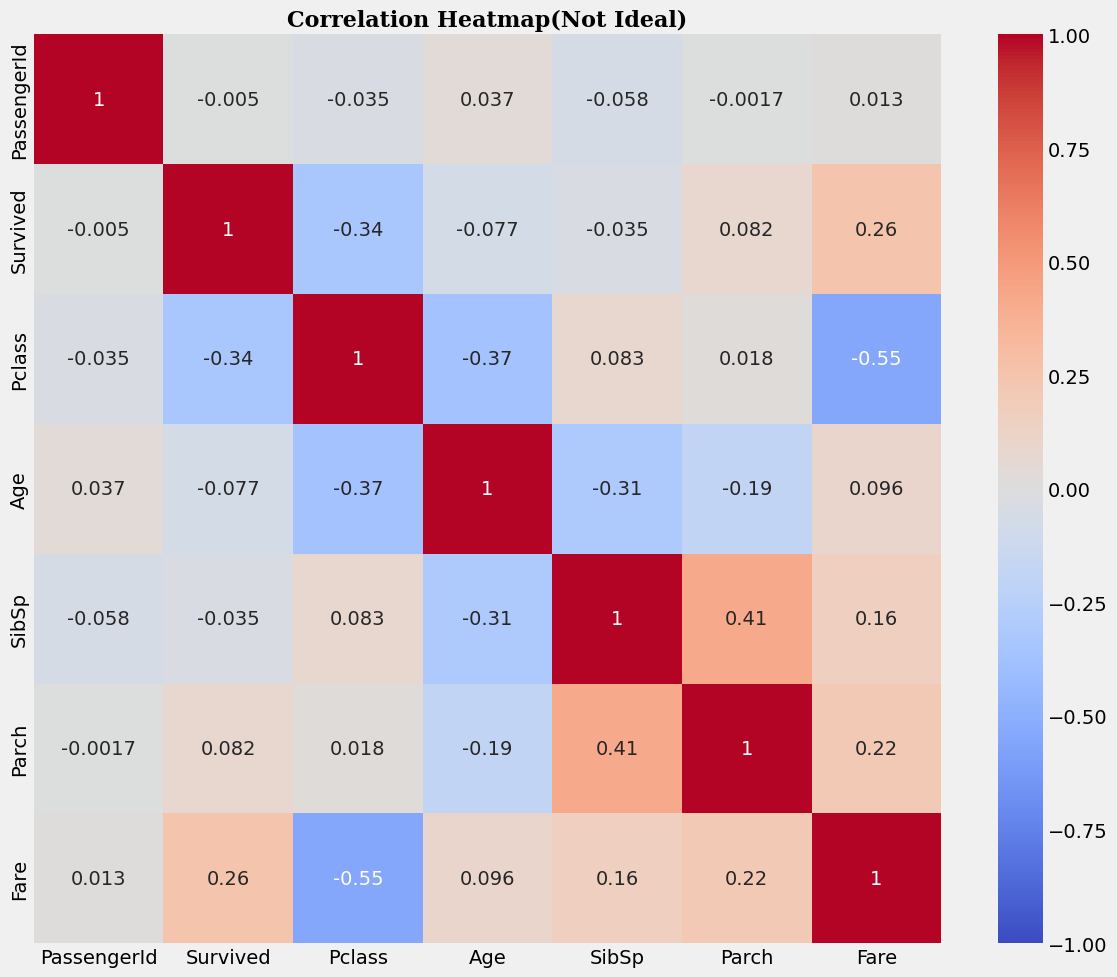

In [20]:
numeric_train = train.select_dtypes(include=[np.number])
# Figure와 Axes 생성
fig, ax = plt.subplots(figsize=(12, 10))  # Figure 크기 설정

# Heatmap 시각화
sns.heatmap(numeric_train.corr(),
            annot=True,           # 상관계수 값을 셀에 표시
            vmin=-1, vmax=1,      # 색상 범위 설정
            center=0,             # 색상 맵의 중앙값 설정
            cmap='coolwarm',      # 색상 맵 설정
            ax=ax)                # Axes 객체 지정

# 제목 추가
ax.set_title('Correlation Heatmap(Not Ideal)', fontsize=16, fontweight='bold', fontfamily='serif')

# 레이아웃 조정
plt.tight_layout()
plt.show()

위의 결과는 옳지 못합니다.
Survived는 이진값에 가까우므로, 연속형 - 연속형 상관관계에 사용되는 피어슨 상관계수를 이용하여 올바른 값을 도출하기 어렵습니다.데이터의 타입에 맞는 다른 검증 방법을 사용하는 것이 좋습니다.

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

대표적으로 아래 컬럼들에 대해 검정을 진행해보겠습니다.

### 범주형 변수 - 이진 변수 (Embarked, Sex)

In [22]:
# 카이제곱 검정 : 범주형 변수와 이진 변수 간의 독립성 테스트
from scipy.stats import chi2_contingency

Embarked_Survived = pd.crosstab(train['Survived'], train['Embarked'])

chi2, p, dof, expected = chi2_contingency(Embarked_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#chi-square이 클수록 독립성이 낮아져, 두 변수 간 유의미한 관계가 있을 가능성이 높아짐
#p-value 0.05 이하일 때 통계적으로 유의미하다는 결론

Chi-square: 26.48914983923762, p-value: 1.769922284120912e-06


In [23]:
Sex_Survived = pd.crosstab(train['Sex'], train['Survived'])

chi2, p, dof, expected = chi2_contingency(Sex_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")

Chi-square: 260.71702016732104, p-value: 1.1973570627755645e-58


두 값으로 미루어볼 때, Sex와 Survived 간의 강한 상관관계를 확인할 수 있습니다.

### 순서 척도 - 이진 변수 (Pclass, SibSp, Parch)

In [24]:
# Spearman's Rank Correlation 계산
from scipy.stats import spearmanr

correlation, p_value = spearmanr(train['Survived'], train['Pclass'])
print(f"Spearman's Rank Correlation: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")
#우연이 아닌 약한 상관관계를 가지고 있을 가능성

Spearman's Rank Correlation: -0.34
p-value: 0.0000


In [25]:
#Pclass를 순서 척도가 아닌 범주형 변수로 취급한다면?
Pclass_Survived = pd.crosstab(train['Pclass'], train['Survived'])

chi2, p, dof, expected = chi2_contingency(Pclass_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#Pclass의 값이 생존 확률에 영향을 미친다.

Chi-square: 102.88898875696056, p-value: 4.549251711298793e-23


### 연속형 변수 - 이진 변수 (Age, Fare)

In [26]:
#Age에 결측치 값이 있었으므로, 결측값 row를 제외하여 따로 샘플을 만들었습니다.
sample_train = train.copy()

In [27]:
sample_train = sample_train.dropna(subset=['Age'])

In [28]:
sample_train = sample_train[['Age', 'Survived']]

In [29]:
# 점-이분 상관계수 (One scale naturally dichotomous(nominal), one scale interval or ratio)
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(sample_train['Survived'], sample_train['Age'])
print(f"Point-Biserial Correlation: {corr:.2f}")
print(f"p-value: {p_value:.4f}")
#거의 관계가 없으며, 유의하지 않다고 결과가 나왔습니다.

Point-Biserial Correlation: -0.08
p-value: 0.0391


그런데 나이가 적다고 많이 살고, 나이가 많다고 적게 산 건 아니었습니다. 오히려 어린 연령대와 나이 많은 연령대의 생존율이 높았으니까요. 이렇게 판단하면 안될 것 같습니다.
이렇게 수치형 변수가 비선형적인 경우는 어떻게 할까요? 팀원과 고민해보세요.

이런 검정을 통해 모델의 성능에 좋지 않은 영향을 끼치며, 과적합 확률을 높이는 피쳐들을 제외하도록 합니다.

# 피처 선택

## 결측치 처리
결측치 처리 방법: 제거(Deletion), 대치(Imputation)

단순 대치법: 평균, 중앙값, 최빈값 등
KNN: 인접하는 점들의 값 활용. 이상치에 민감
다중 대치법

In [30]:
print(train.isna().sum())
print('---')
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

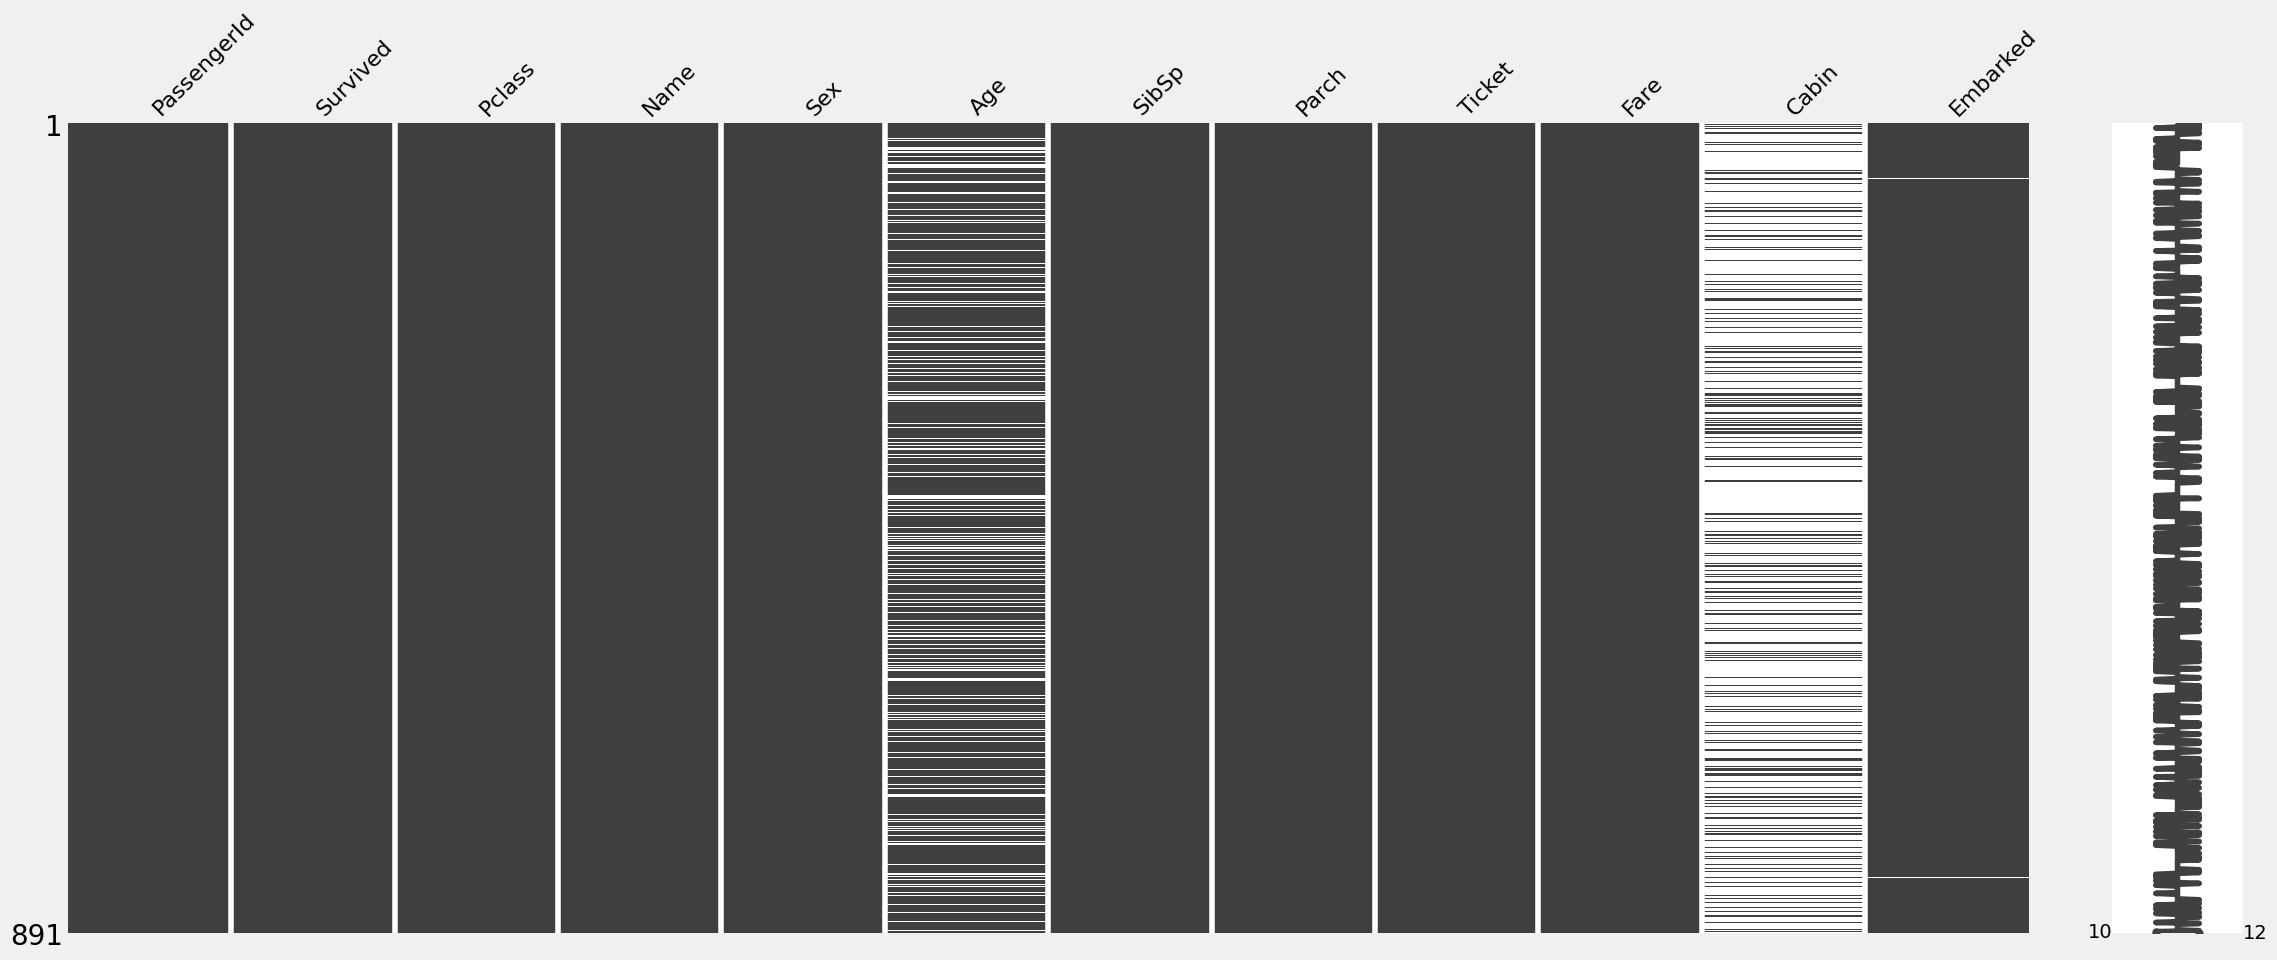

In [33]:
# missingno 라이브러리로 결측치 시각화
import missingno as msno

msno.matrix(train)

<Axes: >

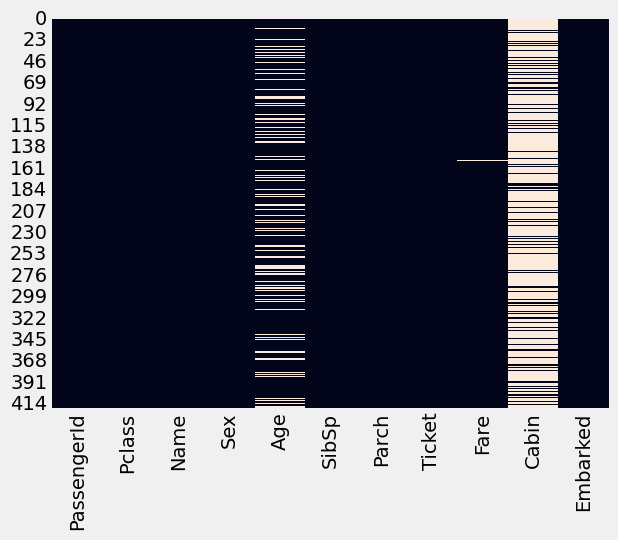

In [32]:
# seaborn 라이브러리로 결측치 시각화
sns.heatmap(test.isna(), cbar=False)

<Axes: >

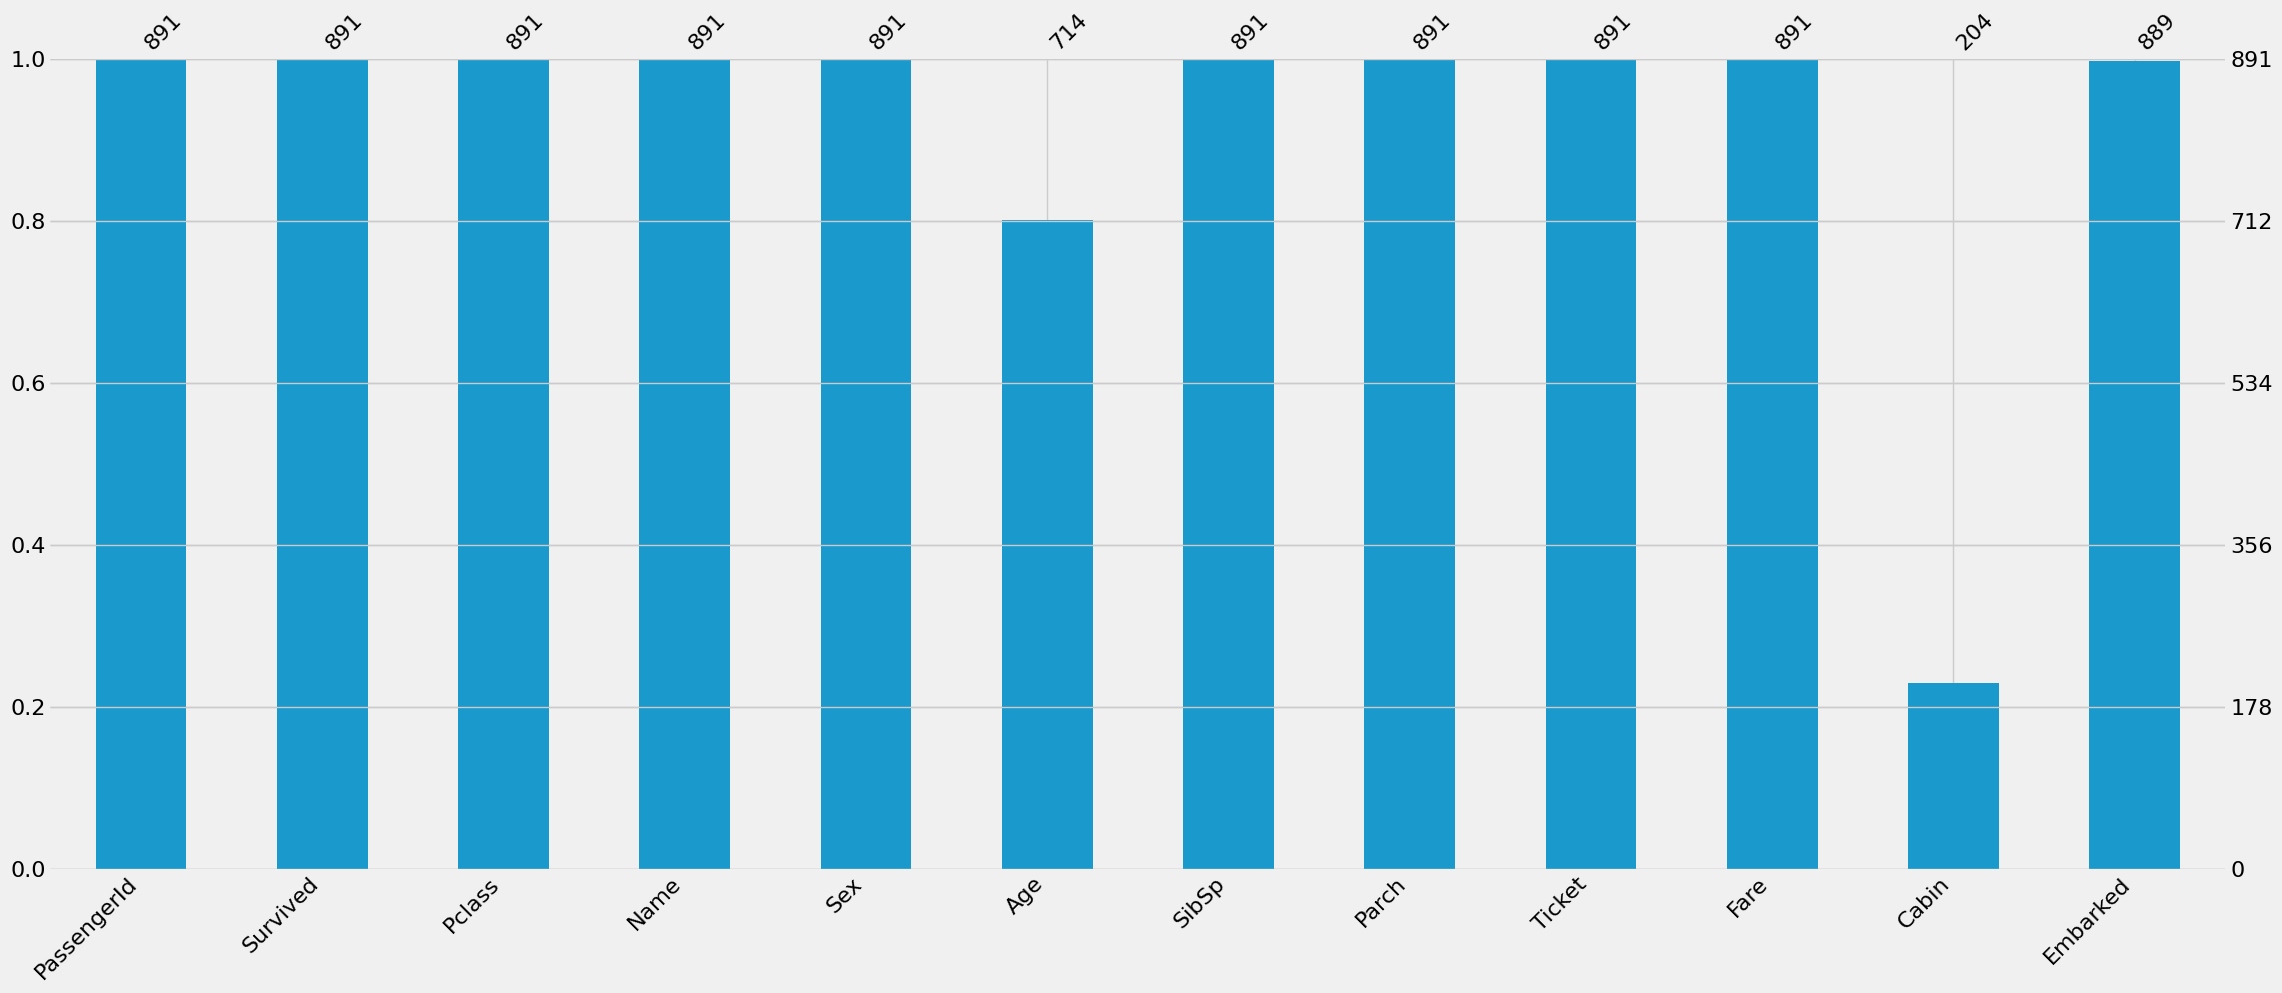

In [34]:
# 바 차트로 결측치 스 시각화
msno.bar(train, color=(0.1, 0.6, 0.8))

- Cabin: 결측값이 너무 많음, 컬럼을 제거하는 것이 나아보임
- Age: 여러 결측값 처리 방법 비교해보기
- Embarked(train): 범주형이므로 mode(최빈값) 사용(또는 드랍 고려)
- Fare(test): 하나임. Pclass를 보고 mean(평균값) 또는 median(중위수) 대체(또는 드랍 고려)


### Cabin 컬럼 제거

In [35]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [36]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


### Age 컬럼 결측치 처리

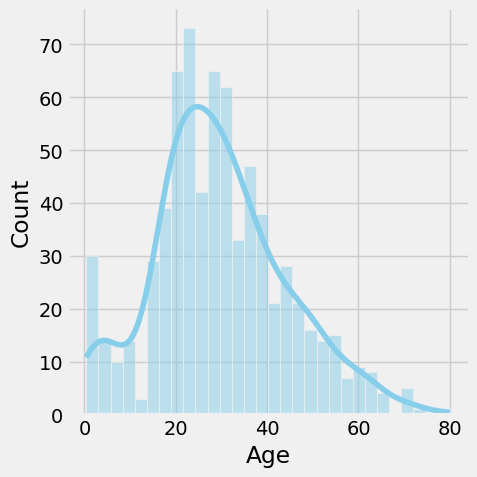

In [37]:
# 결측값 처리 전 age 분포 확인
sns.displot(train['Age'], bins=30, kde=True, color='skyblue')

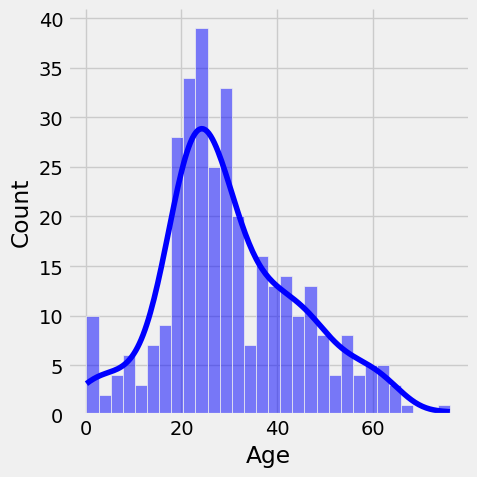

In [38]:
sns.displot(test['Age'], bins=30, kde=True, color='blue')

데이터프레임 복사본을 만들어 결측값을 여러 방법으로 보간해봄

#### 평균값

In [39]:
mean_train = train.copy()
mean_train['Age'].fillna(mean_train['Age'].mean(), inplace=True)
mean_train['Age'].mean()

29.69911764705882

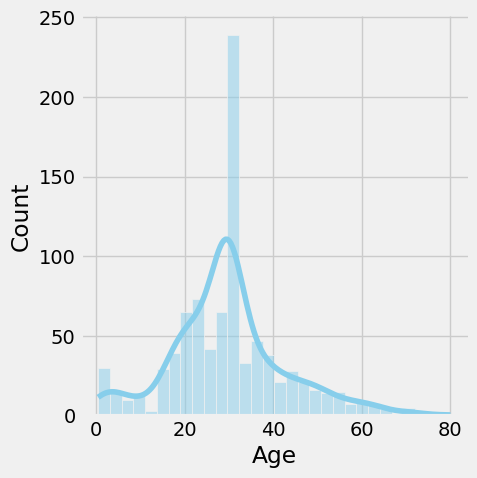

In [40]:
sns.displot(mean_train['Age'], bins=30, kde=True, color='skyblue')

#### 중앙값

In [41]:
median_train = train.copy()
median_train['Age'].fillna(median_train['Age'].median(), inplace=True)
median_train['Age'].median()

28.0

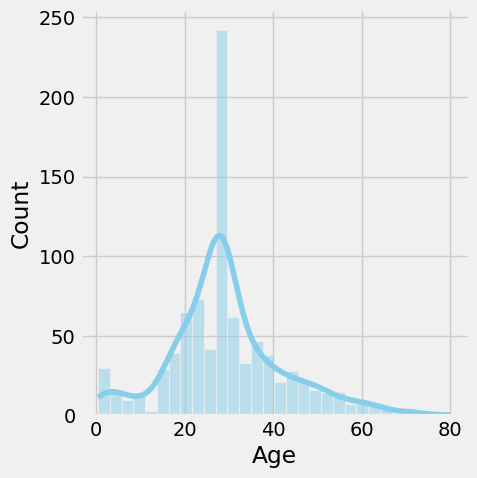

In [42]:
sns.displot(median_train['Age'], bins=30, kde=True, color='skyblue')

#### KNN
- KNNImputer는 결측치 주변의 값 평균으로 결측치를 대체하는 방법
- 연속형 변수에 대해서만 사용할 수 있기 때문에 범주형 변수에 대해 사용하려면 가변수화 과정을 거쳐야 함

In [43]:
from sklearn.impute import KNNImputer

# 범주형 변수->숫자
knn_train = train.copy()
knn_train['Sex'] = knn_train['Sex'].map({'male': 0, 'female': 1})

imputer = KNNImputer(n_neighbors=5)
knn_train[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex']] = imputer.fit_transform(knn_train[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex']])

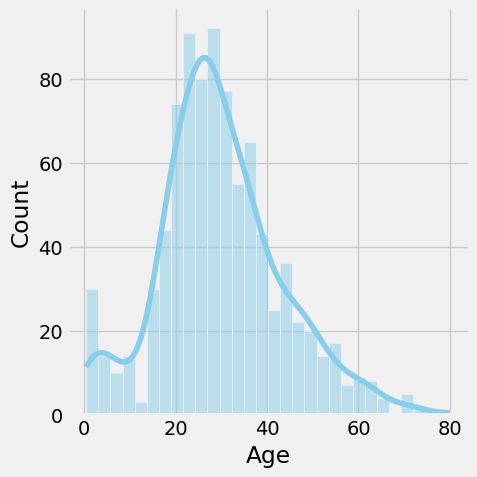

In [44]:
sns.displot(knn_train['Age'], bins=30, kde=True, color='skyblue')

#### MICE(다중대치법)
- Multiveriate Imputation by Chained Equations의 약자로 다중 대치법 중의 하나
- 결측치를 회귀값으로 대체하되 여러 번 대체해 보면서 최상의 값을 찾아내는 알고리즘
- 수치형 변수에만 사용이 가능하고 범주형 변수에 사용하려면 전처리가 필요

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_train = train.copy()

mice_train['Sex'] = mice_train['Sex'].map({'male': 0, 'female': 1})

col_impute = ['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

# MICE(IterativeImputer) 적용
imputer = IterativeImputer(random_state=48)
mice_train[col_impute] = imputer.fit_transform(mice_train[col_impute])

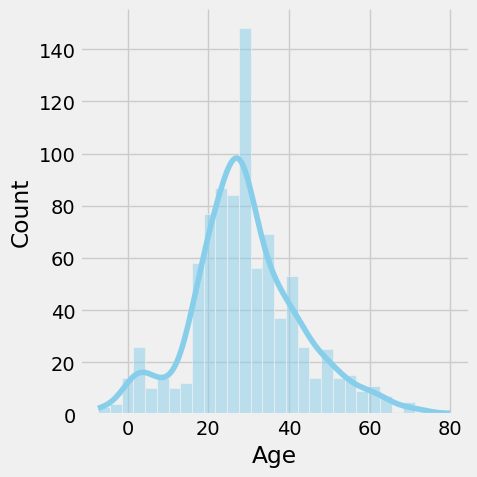

In [46]:
sns.displot(mice_train['Age'], bins=30, kde=True, color='skyblue')

#### 파생변수: Title(<-Name)별 중앙값

In [47]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [48]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# 'Name' 컬럼에서 정규식을 적용해 특정 문자열 추출하기
# 공백+알파벳 대소문자로 된 연속된 문자열+뒤에 온점 있을 때
train['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


- Miss: 미혼 여성, 여자아이
- Mrs: 기혼 여성
- Mr: 성인 남성
- Master: 남자아이
---
- Lady: 영국 귀족 여성
- Mlle: "Mademoiselle"의 약어, 프랑스 미혼 여성
- Mme: "Madame"의 약어, 프랑스 기혼 여성
- Ms: 여성(기혼 여부와 관계 없음)
- Countess: 백작 부인(귀족 여성)
- Sir: 영국 기사 작위 남성
- Don: 스페인어권 귀족 남성
- Jonkheer: 네덜란드 귀족 남성
- Col: 군사 계급. 대령.
- Major: 군사 계급. 중령.
- Capt: 군사 계급. 대위. 또는 선장.
- Rev: 성직자
- Dr: 의사, 박사

-> 적은 수는 결혼 여부, 직업 또는 지위로 묶기

In [49]:
# 같은 의미의 타이틀 매핑
title_mapping = {
    'Miss': 'Woman', 'Mrs':'Woman', 'Mlle': 'Woman', 'Ms': 'Woman', 'Mme': 'Woman', 'Lady': 'Woman', 'Countess': 'Woman',
    'Sir': 'Mr', 'Don': 'Mr', 'Jonkheer': 'Mr',
    'Col': 'prof', 'Major': 'prof', 'Capt': 'prof',
    'Rev': 'prof', 'Dr': 'prof'
    }
train['Title'] = train['Title'].replace(title_mapping)
test['Title'] = test['Title'].replace(title_mapping)

In [50]:
set(test['Title'].unique()) - set(train['Title'].unique())
# 이렇게 train에는 없지만 test에는 있는 Title이 있을 수 있다.->test 데이터는 모른다고 가정, 미리 매핑 불가.
# 따라서 '기타' 타이틀을 하나 만들어야 한다.

{'Dona'}

In [51]:
valid_titles = set(train['Title'].unique())

train['Title'] = train['Title'].apply(lambda x: x if x in valid_titles else 'Other')
test['Title'] = test['Title'].apply(lambda x: x if x in valid_titles else 'Other')

In [52]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())
# test data의 'Dona'가 'Other'로 잘 매핑된 것을 확인할 수 있다.

Title
Mr        520
Woman     313
Master     40
prof       18
Name: count, dtype: int64
Title
Mr        240
Woman     151
Master     21
prof        5
Other       1
Name: count, dtype: int64


In [53]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Mr,0,520
Woman,313,0
prof,1,17


<Axes: xlabel='Title', ylabel='count'>

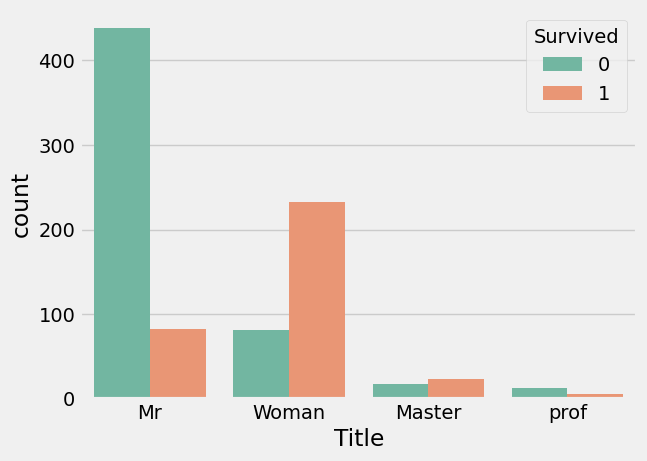

In [54]:
sns.countplot(x='Title', hue='Survived', data=train, palette='Set2')

In [55]:
# 타이틀별로 나이 결측치 중앙값으로 보간
train['Age'] = train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

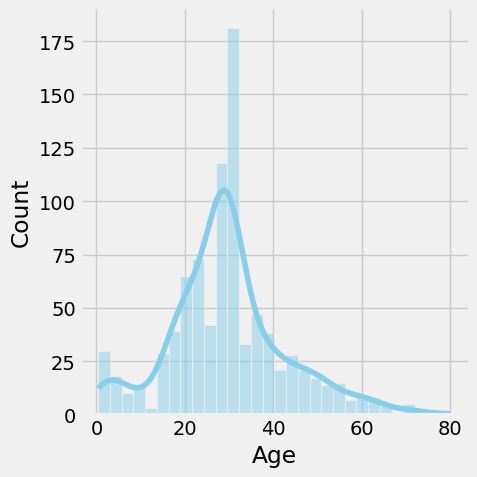

In [56]:
sns.displot(train['Age'], bins=30, kde=True, color='skyblue')

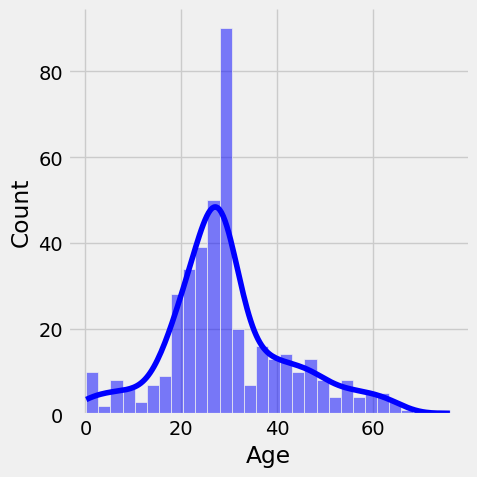

In [57]:
sns.displot(test['Age'], bins=30, kde=True, color='blue')

### Embarked 결측치 처리
범주형 변수, mode로 보간  
(수가 적어 단순 제거도 가능)

In [58]:
# Embarked가 결측치인 2개 행 출력
train.loc[train['Embarked'].isnull() == True, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Woman
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Woman


In [59]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

### Fare 결측치 처리

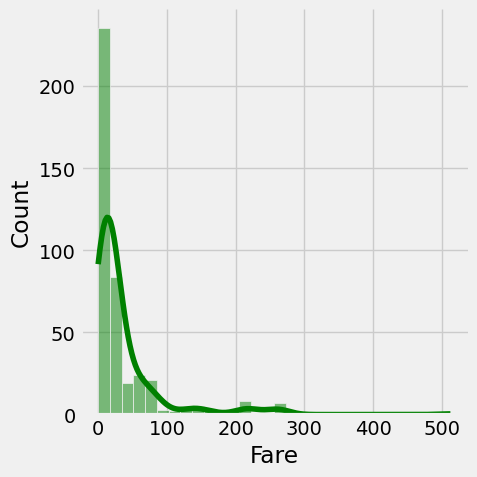

In [60]:
sns.displot(test['Fare'], bins=30, kde=True, color='green')

In [61]:
# Fare가 결측치인 행 출력
test.loc[test['Fare'].isnull() == True, :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


등급별로 요금 차이가 크지 않을까?  
->차이 뚜렷하게 있음, Pclass 기준으로 Fare 보간

<Axes: xlabel='Pclass', ylabel='Fare'>

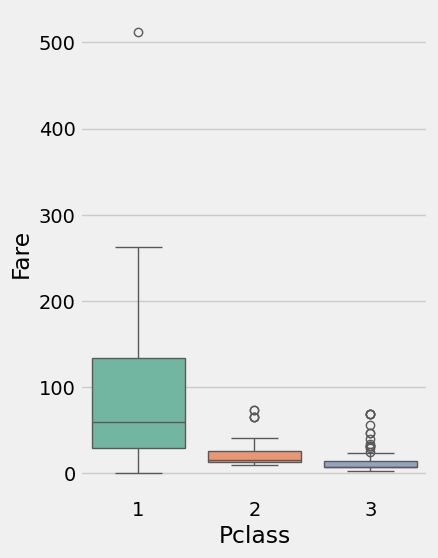

In [62]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='Pclass', y='Fare', data=test, palette = 'Set2')

In [63]:
# 결측치를 해당 등급의 평균값으로 보간
test['Fare'] = test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

결측치 처리가 완료되었는지 확인하기.

In [64]:
print(train.isna().sum())
print('---')
print(test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64
---
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


## 파생변수 생성: 일행 수
- 일행 수
    - Family  
    가족 구성원 수: SibSp+Parch+1(본인)->생존 가능성과의 연관성을 더 찾을 수 있을 것이라고 판단.
    - Group  
    Family가 반영하지 못하는 정부, 약혼자, 연인, 유모, 친구 등의 일행을 반영하고자 함. 티켓 번호가 같은 사람을 하나의 일행으로 간주.
    - Total Group  
    Family와 Group 중 큰 값을 적용

In [65]:
train['Ticket'].value_counts(ascending=False)
# 681개의 행.

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [66]:
# Family: 가족 구성원 수=형제/자매/배우자+부모/자녀+본인
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

# Group: 티켓 번호 기반 일행 수 계산(본인 포함)
train['Group'] = train.groupby('Ticket')['Ticket'].transform('count')
test['Group'] = test.groupby('Ticket')['Ticket'].transform('count')

# Total Group: Group, Family 중 max값
train['Total_Group'] = train[['Group', 'Family']].max(axis=1)
test['Total_Group'] = test[['Group', 'Family']].max(axis=1)

# 인코딩

모델링을 진행할 때 범주형 변수를 그대로 넣으면 모델이 인식하지 못하고 에러를 발생시킴  
-> 모델에 넣을 수 있는 형식으로 인코딩하는 과정 필요.
- Label Encoding  
한 컬럼(변수) 내에 존재할 수 있는 n개의 특성값을 각각 0 ~ n-1 의 연속적 수치 데이터로 변환시켜주는 방법.
- One-Hot Encoding  
한 컬럼(변수) 내에 존재할 수 있는 n개의 특성값들을 각각 n개의 비트 벡터로 표현하는 방식을 사용하여 범주형 변수 인코딩. True/False

인코딩할 범주형 변수는 'Pclass', 'Embarked', 'Sex'이다.
- Pclass: 등급을 나타내는, 순서형 데이터이므로 Label Encoding을 하는 것이 적합해보인다.
- Sex: 순서가 없는 범주형이므로 원핫인코딩
- Embarked, Title: 순서가 없는 명목형 데이터이므로 원핫인코딩을 사용하는 것이 적합해보인다.(여기서는 더미변수로 만들어주었다.)
    * 더미화: 첫 번째 범주를 제거하여 다중공선성 피하는 방식.

## Label Encoding: Pclass

In [67]:
from sklearn.preprocessing import LabelEncoder

le_pclass = LabelEncoder()
train['Pclass'] = le_pclass.fit_transform(train['Pclass'])
test['Pclass'] = le_pclass.transform(test['Pclass'])

## One-Hot Encoding: Embarked, Title, Sex

In [68]:
train = pd.get_dummies(train, columns=['Embarked', 'Title', 'Sex'], drop_first=False)
test = pd.get_dummies(test, columns=['Embarked', 'Title', 'Sex'], drop_first=False)

cols_to_drop = ['Embarked_C', 'Title_Mr', 'Sex_female']
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [69]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Family', 'Group', 'Total_Group', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof', 'Sex_male'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Family', 'Group', 'Total_Group', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Other', 'Title_Woman', 'Title_prof', 'Sex_male'],
      dtype='object')


# 다중공선성 확인(VIF)
- VIF: Variance Inflation Factor.  
- VIF 값이 높으면, 해당 변수와 다른 변수 간 강한 상관관계가 있음=다중공선성 문제가 있음.  
- 일반적으로 VIF>5면 주의를 요하며 VIF>10이면 다중공선성 문제가 있다고 판단한다.

### 파생변수 미포함 VIF

In [70]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_vars = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
dummy_vars = ['Embarked_Q', 'Embarked_S', 'Sex_male']

In [71]:
X_numeric = train[numeric_vars]
X_categorical = train[dummy_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = sm.add_constant(X)

X = X.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  22.119279
1      Pclass   1.778629
2         Age   1.240756
3        Fare   1.649249
4       SibSp   1.294225
5       Parch   1.332041
6  Embarked_Q   1.495023
7  Embarked_S   1.463722
8    Sex_male   1.127394


### 파생변수 포함 VIF

In [72]:
numeric_vars1 = ['Pclass', 'Age', 'Fare', 'Total_Group']
dummy_vars1 = ['Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof']

In [73]:
X_numeric = train[numeric_vars1]
X_categorical = train[dummy_vars1]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = sm.add_constant(X)

X = X.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       Variable        VIF
0         const  25.473713
1        Pclass   1.867283
2           Age   1.492080
3          Fare   1.822862
4   Total_Group   1.480795
5    Embarked_Q   1.501448
6    Embarked_S   1.468279
7  Title_Master   1.434386
8   Title_Woman   1.214314
9    Title_prof   1.066348


성별과 타이틀이 거의 같은 정보를 담고 있으므로, 성별도 드랍한다.

## 피처 중요도(Feature Importance) 확인
트리 기반 모델로 피처 중요도 계산 시 스케일링 전에 진행해도 문제 없음.

### 파생변수 미포함

In [74]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features1 = ['Pclass', 'Age', 'Fare', 'Sex_male', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']

X = train[selected_features1]
y = train['Survived']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train1, y_train1)

feature_importances1 = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model1.feature_importances_})
feature_importances1 = feature_importances1.sort_values(by='Importance', ascending=False)

<Axes: xlabel='Importance', ylabel='Feature'>

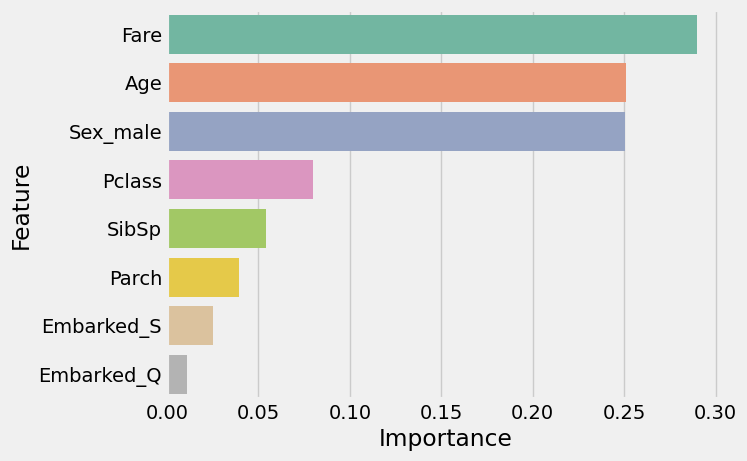

In [75]:
sns.barplot(x='Importance', y='Feature', data=feature_importances1, palette='Set2')

### 파생변수 포함

In [76]:
# Random Forest

selected_features2 = ['Pclass', 'Age', 'Fare', 'Total_Group', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof']

X = train[selected_features2]
y = train['Survived']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

feature_importances2 = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model2.feature_importances_})
feature_importances2 = feature_importances2.sort_values(by='Importance', ascending=False)

In [77]:
feature_importances2
# Military, prof는 중요도 거의 없음, 합치는 게 나을 듯

,Feature,Importance
7,Title_Woman,0.269903
2,Fare,0.264095
1,Age,0.241637
3,Total_Group,0.088593
0,Pclass,0.082125
5,Embarked_S,0.024444
6,Title_Master,0.014439
4,Embarked_Q,0.008836
8,Title_prof,0.005927


<Axes: xlabel='Importance', ylabel='Feature'>

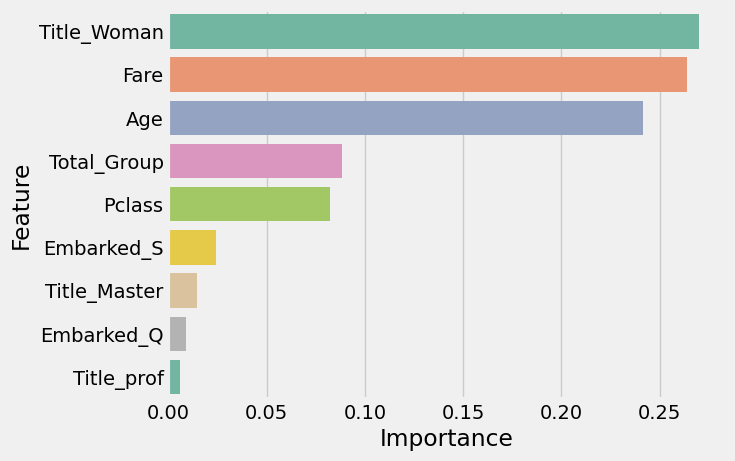

In [78]:
sns.barplot(x='Importance', y='Feature', data=feature_importances2, palette='Set2')

In [79]:
from sklearn.metrics import accuracy_score

y_pred1 = rf_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)

y_pred2 = rf_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

print("미포함 모델 정확도:", accuracy1)
print("포함 모델 정확도:", accuracy2)

미포함 모델 정확도: 0.8212290502793296
포함 모델 정확도: 0.8268156424581006


## 피처 제거

In [80]:
# 사용하지 않을 컬럼은 드랍함
train = train.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Family', 'Group'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Family', 'Group'], axis=1)

In [81]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Total_Group', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof', 'Sex_male'],
      dtype='object')
Index(['Pclass', 'Age', 'Fare', 'Total_Group', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Other', 'Title_Woman', 'Title_prof', 'Sex_male'],
      dtype='object')


# 이상치 판단

In [82]:
train.describe()

,Survived,Pclass,Age,Fare,Total_Group
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.308642,29.483917,32.204208,2.103255
std,0.486592,0.836071,13.152945,49.693429,1.688860
min,0.000000,0.000000,0.420000,0.000000,1.000000
25%,0.000000,1.000000,22.000000,7.910400,1.000000
50%,0.000000,2.000000,30.000000,14.454200,1.000000
75%,1.000000,2.000000,35.000000,31.000000,3.000000
max,1.000000,2.000000,80.000000,512.329200,11.000000


In [83]:
test.describe()

,Pclass,Age,Fare,Total_Group
count,418.000000,418.000000,418.000000,418.000000
mean,1.265550,29.612440,35.571764,1.933014
std,0.841838,12.863184,55.851997,1.539351
min,0.000000,0.170000,0.000000,1.000000
25%,0.000000,22.000000,7.895800,1.000000
50%,2.000000,28.500000,14.454200,1.000000
75%,2.000000,35.750000,31.471875,2.000000
max,2.000000,76.000000,512.329200,11.000000


### Age 이상치 처리

In [84]:
print(train['Age'].unique())
print('---')
print(train['Age'].value_counts().sort_index(ascending=False))

[22.   38.   26.   35.   30.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.    3.5  17.
 32.   16.   25.    0.83 33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
---
Age
80.00    1
74.00    1
71.00    2
70.50    1
70.00    2
        ..
0.92     1
0.83     2
0.75     2
0.67     1
0.42     1
Name: count, Length: 89, dtype: int64


나이가 소수점인 값들이 꽤 있음

-> 나이가 추정되었다면 .5 형식으로 표시되었다고 함.  
-> 1살보다 어리면, 소수(0.xx)로 표현함.

In [85]:
train[train['Age'] < 1]

,Survived,Pclass,Age,Fare,Total_Group,Embarked_Q,Embarked_S,Title_Master,Title_Woman,Title_prof,Sex_male
78,1,1,0.83,29.0000,3,False,True,True,False,False,True
305,1,0,0.92,151.5500,4,False,True,True,False,False,True
469,1,2,0.75,19.2583,4,False,False,False,True,False,False
644,1,2,0.75,19.2583,4,False,False,False,True,False,False
755,1,1,0.67,14.5000,3,False,True,True,False,False,True
803,1,2,0.42,8.5167,2,False,False,True,False,False,True
831,1,1,0.83,18.7500,3,False,True,True,False,False,True


title을 보면, male은 모두 Master인 것을 알 수 있음(=어린 아이), 따로 처리하지 않고 그대로 두기로 함.

### Fare 이상치 처리

1. Z-점수(Z-score)  
- 평균값을 기반으로 이상치를 탐지하는 방법
- 각 데이터 포인트가 평균으로부터 얼마나 떨어져 있는지를 나타내는 표준 점수를 계산
- Z-점수가 3을 초과하면 이상치로 간주
- 데이터가 정규분포일 때 효과적

2. IQR(Interquartile Range)  
- 사분위수 기반으로 이상치를 탐지하는 방법
- Q1(25%)와 Q3(75%)의 차이를 IQR이라고 하며, Q1 – 1.5 * IQR 미만이나 Q3 + 1.5 * IQR 초과하는 데이터를 이상치로 판단
- boxplot을 사용하면 쉽게 확인할 수 있음
- 정규분포가 아닌 경우에도 사용 가능(이상치에 강함)

=> 큰 이상치가 있으므로 IQR로 제거

#### Z-score

In [86]:
z_train = train.copy()

from scipy import stats

z_scores = stats.zscore(z_train['Fare'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3

z_train = z_train[abs_z_scores <= age_threshold]

In [87]:
z_train.shape

(871, 11)

In [88]:
z_train.describe()

,Survived,Pclass,Age,Fare,Total_Group
count,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.376579,1.338691,29.447956,26.530170,2.064294
std,0.484806,0.821469,13.177691,29.351184,1.674144
min,0.000000,0.000000,0.420000,0.000000,1.000000
25%,0.000000,1.000000,22.000000,7.895800,1.000000
50%,0.000000,2.000000,30.000000,13.862500,1.000000
75%,1.000000,2.000000,35.000000,30.000000,3.000000
max,1.000000,2.000000,80.000000,164.866700,11.000000


#### IQR

In [89]:
Q1 = train["Fare"].quantile(0.25)
Q3 = train["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  7.9104
Q3:  31.0
IQR:  23.0896


In [90]:
# train 이상치 제거
train = train[(train['Fare'] >= Q1 - 1.5 * IQR) & (train['Fare'] <= Q3 + 1.5 * IQR)]

# test 이상치 변환
test["Fare"] = np.clip(test["Fare"], lower_bound, upper_bound)

train과 test 데이터가 나누어져 있는 경우, train에서 이상치를 제거한 후 학습하더라도 test에서는 이상치를 제거하지 않아야 함.

-> lower bound보다 작은 값은 lower bound, upper bound보다 큰 값은 upper bound로 변환

<Axes: xlabel='Fare'>

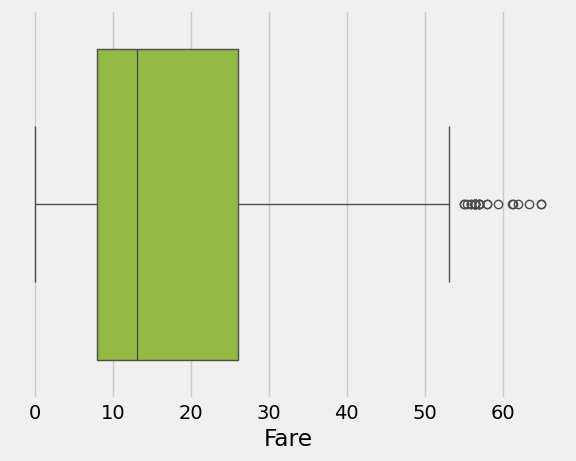

In [91]:
sns.boxplot(x='Fare', data=train, color='yellowgreen')

<Axes: xlabel='Fare'>

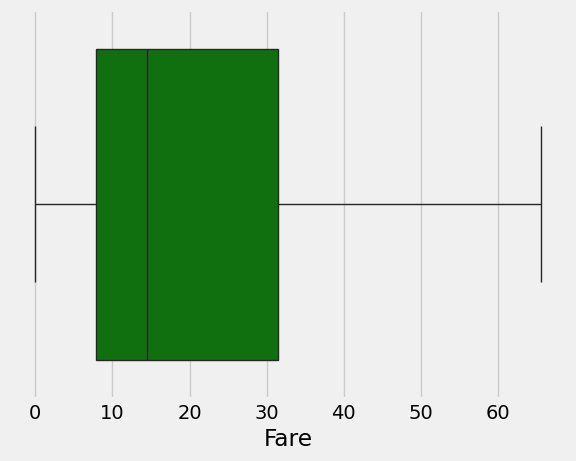

In [92]:
sns.boxplot(x='Fare', data=test, color='green')

## 왜도 처리: Fare
데이터의 분포가 치우쳐 있을 때.
1. 로그 변환: 큰 수를 작은 수로 변환함으로써 계산 용이,
왜도와 첨도를 줄임으로써 분석에서 더 정확한 값을 얻을 수 있음. 왜도가 클 때(극단적인 값이 많을 때) 사용.
데이터 값 간 간격이 클 경우 좁혀줌.
2. 루트(제곱근) 변환: 치우친 분포 정규화.
변수간 비선형 상관성을 선형 상관성으로 변환,
선형 회귀에서 잔차의 이분산성 감소,
데이터의 특정 부분을 시각화하는 데 집중. 왜도가 적당할 때 사용.
3. Box-Cox 변환: 데이터가 양수일 때 사용되며, 데이터를 어떤 지수로 제곱하는 방법으로 변환. λ 값이 0일 경우 로그 변환, 1인 경우는 원래 데이터 이용과 같음. 모델링을 위한 최적의 정규성을 찾고자 할 때 사용.

현재 Fare가 한쪽으로 치우쳐 있으므로 처리 필요.

‼️**개별 변수**의 왜도가 심하면 **왜도 처리**, **전체 데이터**의 스케일링을 표준 정규 분포 형태로 맞추고 싶다면 **스케일링**‼️  
정규 분포를 따르지 않고 왜도가 크면 왜도 처리 / 값 크기 차이가 크면 스케일링. 필요에 따라 둘 다 적용하기도, 생략하기도 함.

### 로그 변환
데이터 중 0이 있다면 전체에 1을 더한 후 로그 변환을 사용해야 한다. (np.log1p)

In [93]:
train_log = train.copy()
train_log['Fare'] = np.log1p(train_log['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

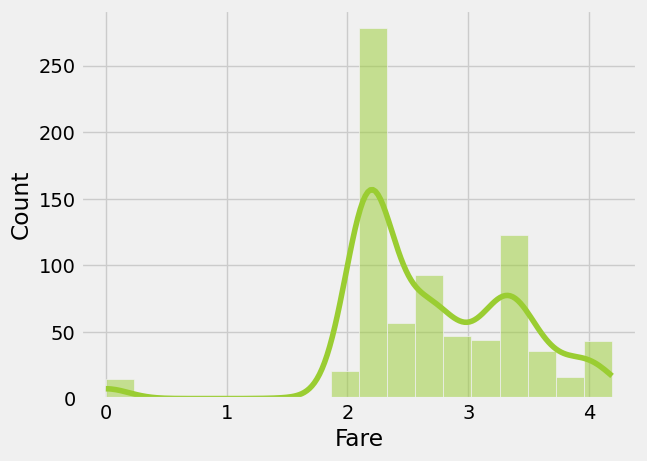

In [94]:
sns.histplot(train_log['Fare'], kde=True, color="yellowgreen")

In [95]:
from scipy.stats import skew

skew(train_log['Fare'])

-0.513794334993771

### 제곱근 변환

In [96]:
train_sqrt = train.copy()
train_sqrt['Fare'] = np.sqrt(train_sqrt['Fare'])

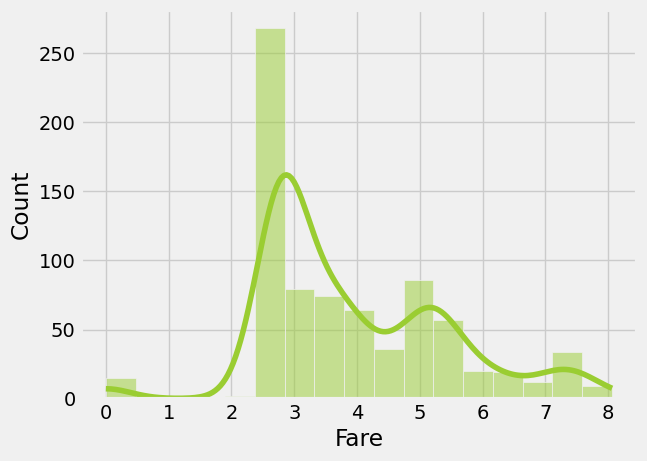

In [97]:
sns.histplot(train_sqrt['Fare'], kde=True, color="yellowgreen")
plt.show()

In [98]:
skew(train_sqrt['Fare'])

0.5756618692280274

### Box-Cox 변환

In [99]:
from scipy import stats

train['Fare'], best_lambda = stats.boxcox(train['Fare'] + 1)
test['Fare'], best_lambda = stats.boxcox(test['Fare'] + 1)

print(best_lambda)

-0.1093668523301739


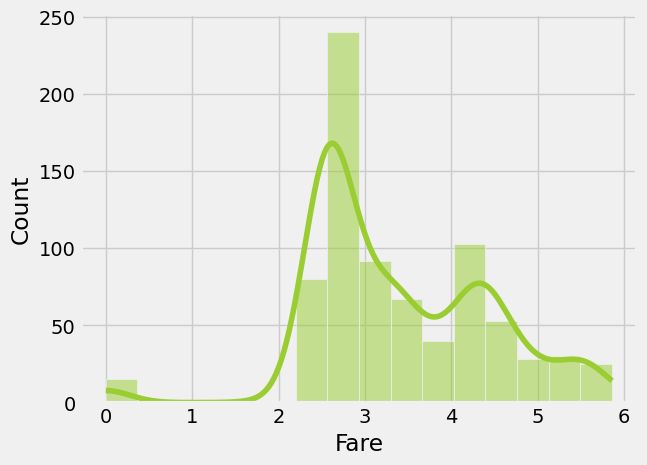

In [100]:
sns.histplot(train['Fare'], kde=True, color="yellowgreen")
plt.show()

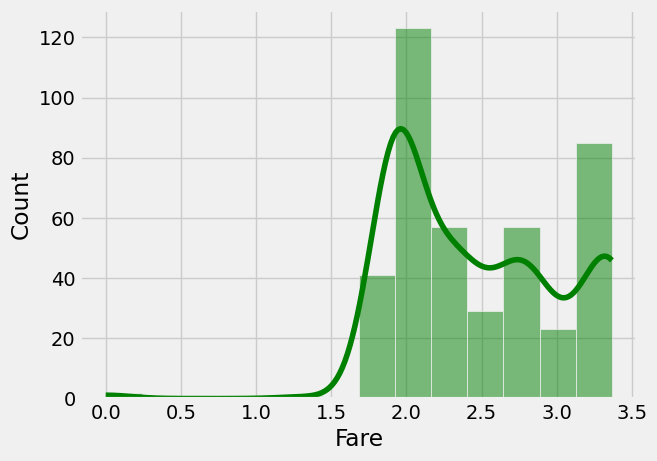

In [101]:
sns.histplot(test['Fare'], kde=True, color="green")
plt.show()

In [102]:
print(skew(train['Fare']))
print(skew(test['Fare']))

0.03321048442702718
0.0007588912563858256


# 스케일
스케일링이 필요한 경우: 변수가 각각 다른 단위 및 범위를 가질 때, 회귀 모형이나 머신러닝 기법 등에서 문제를 일으키는 것을 방지하기 위함. 왜도와 첨도를 줄여 정규성 높아짐.

<스케일링 종류>  
1) StandardScaler: 평균을 제거하고 단위 분산으로 조정. 평균을 0, 분산을 1로 스케일링. 이상치가 큰 데이터에는 취약하기에 이상치 제거 후 스케일링해야 함.  
2) MinMaxScaler: 각 특성이 0과 1 사이에 위치하도록 스케일링함. 극단적 이상치 값에 매우 취약하기에 이상치 제거 후 스케일링해야 함.  
3) MaxAbsScaler: 절댓값이 0과 1 사이에 위치하도록 스케일링함. (-1~1) 모든 데이터가 양수인 경우 MinMax와 동일. 이상치에 민감.  
4) Robust Scaler: 평균과 분산 대신 사분위수를 사용함. 중앙값과 IQR을 사용하므로 이상치 영향 최소화.  
5) Normalizer: 컬럼이 아닌 열 기준으로 열마다 정규화를 진행. 한 행의 모든 변수 사이의 유클리드 거리가 1이 되도록. 학습 속도 빠르고 과적합 확률 적어짐.  

- Age: 정규분포에 가까운 형태, 이상치 없음. Standard Scaler 선택.
- Fare: 오른쪽으로 긴 꼬리 형태, 이상치는 없으나 비대칭 분포. Robust Scaler 선택.

→ 선형, 거리 기반 모델이면 스케일링 필요  
→ 트리 기반 모델이면 추가 스케일링 불필요

Text(0.5, 1.0, 'Fare Distribution')

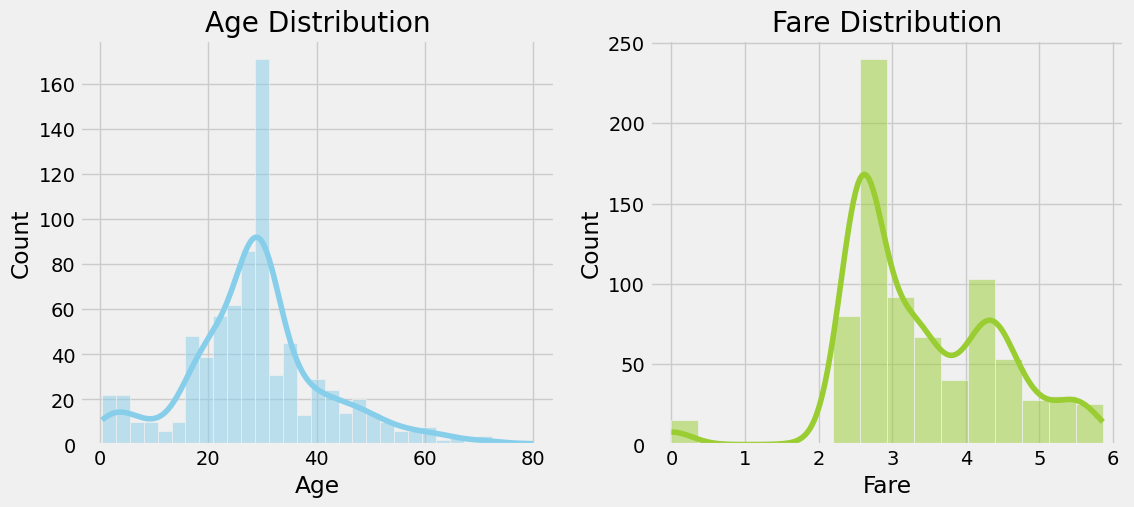

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### Standard Scaler

In [104]:
from sklearn.preprocessing import StandardScaler

train_st = train.copy()

scaler = StandardScaler()
train_st[['Age', 'Fare']] = scaler.fit_transform(train_st[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

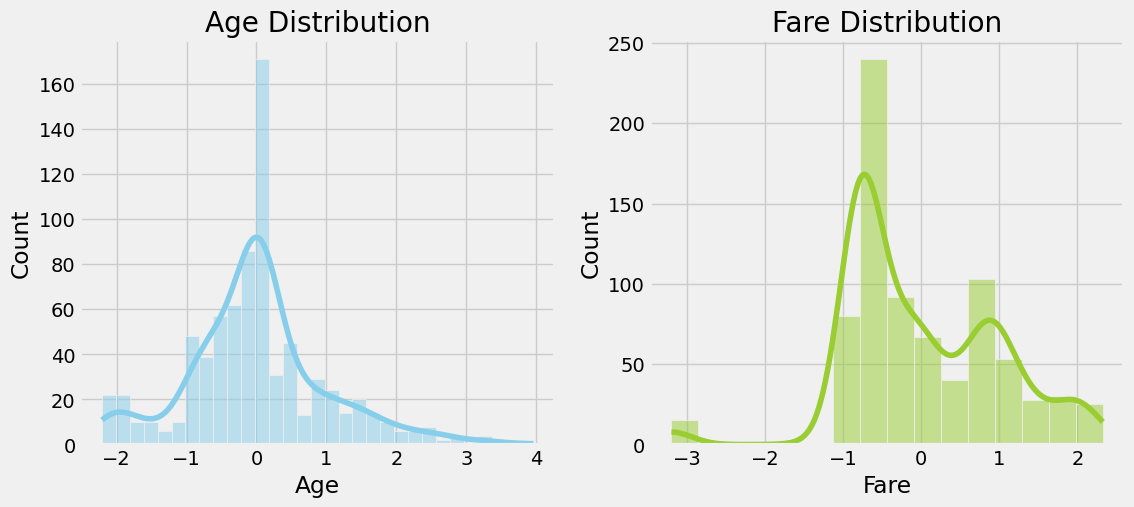

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_st['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_st['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### MinMaxScaler

In [106]:
from sklearn.preprocessing import MinMaxScaler

train_minmax = train.copy()

scaler = MinMaxScaler()
train_minmax[['Age', 'Fare']] = scaler.fit_transform(train_minmax[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

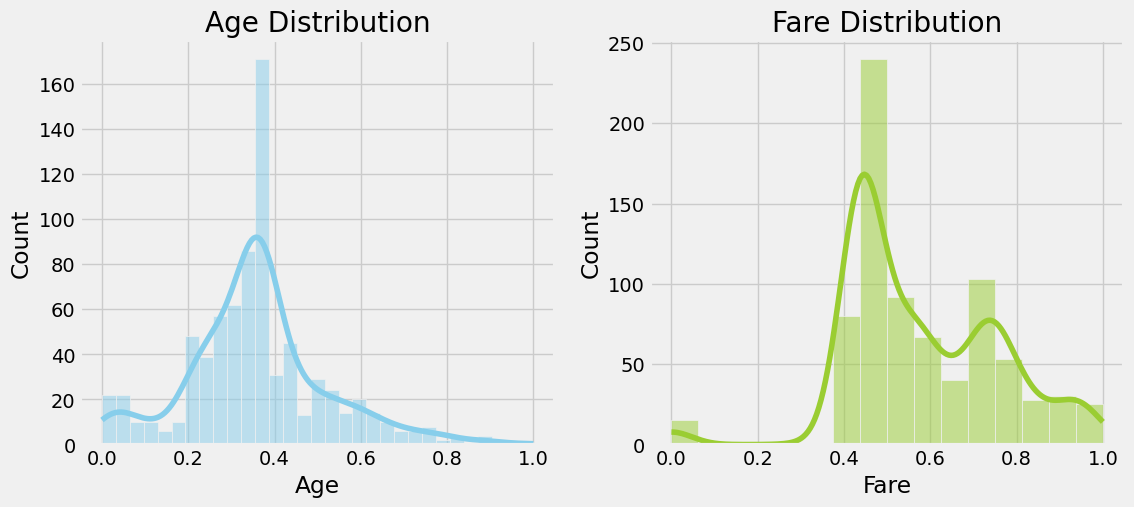

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_minmax['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_minmax['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### MaxAbsScaler

In [108]:
from sklearn.preprocessing import MaxAbsScaler

train_maxabs = train.copy()

scaler = MaxAbsScaler()
train_maxabs[['Age', 'Fare']] = scaler.fit_transform(train_maxabs[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

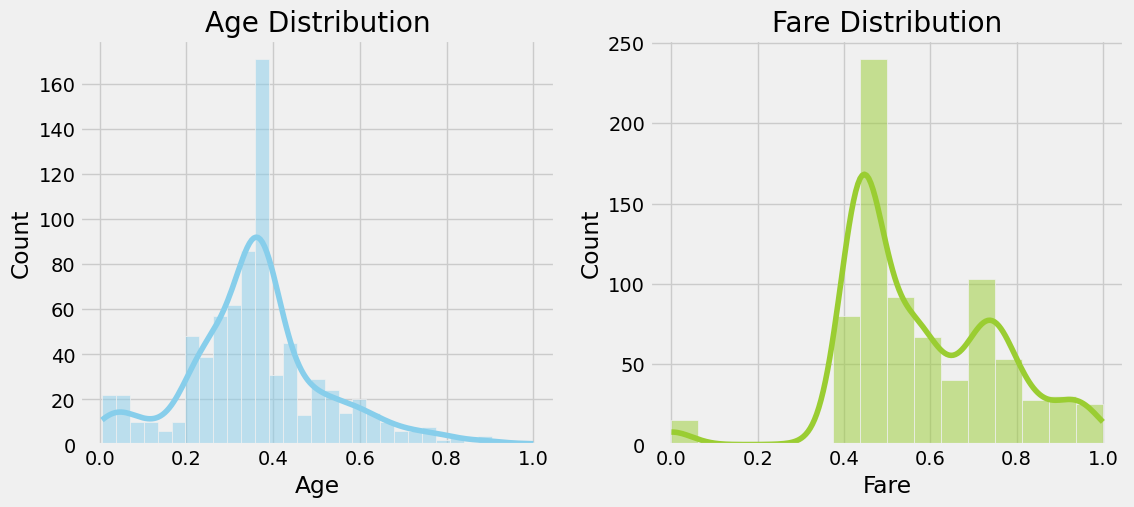

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_maxabs['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_maxabs['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### Robust Scaler

In [110]:
from sklearn.preprocessing import RobustScaler

train_robust = train.copy()

scaler = RobustScaler()
train_robust[['Age', 'Fare']] = scaler.fit_transform(train_robust[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

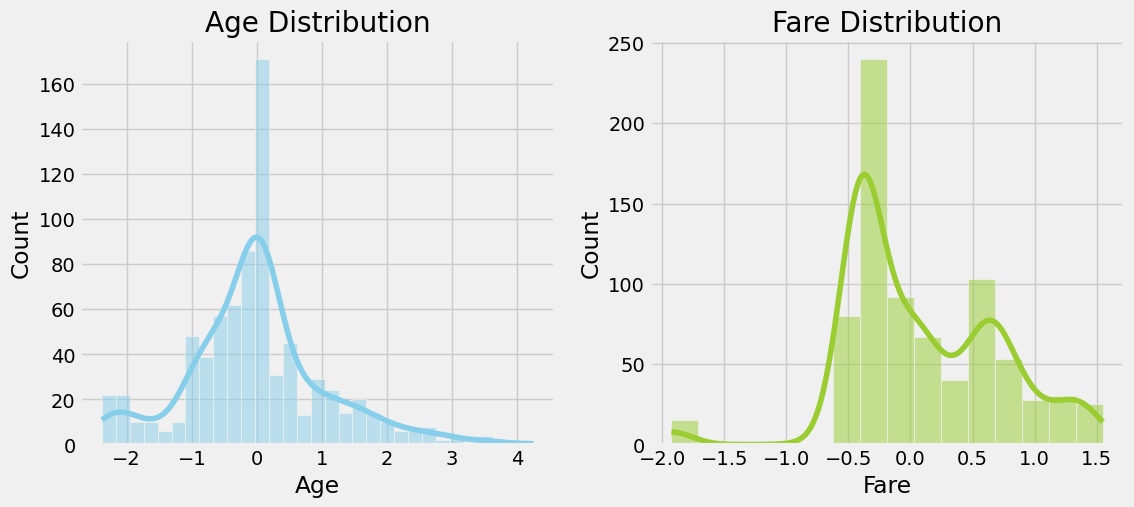

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_robust['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_robust['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### Normalizer

In [112]:
from sklearn.preprocessing import Normalizer

train_normalized = train.copy()

scaler = Normalizer()
train_normalized[['Age', 'Fare']] = scaler.fit_transform(train_normalized[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

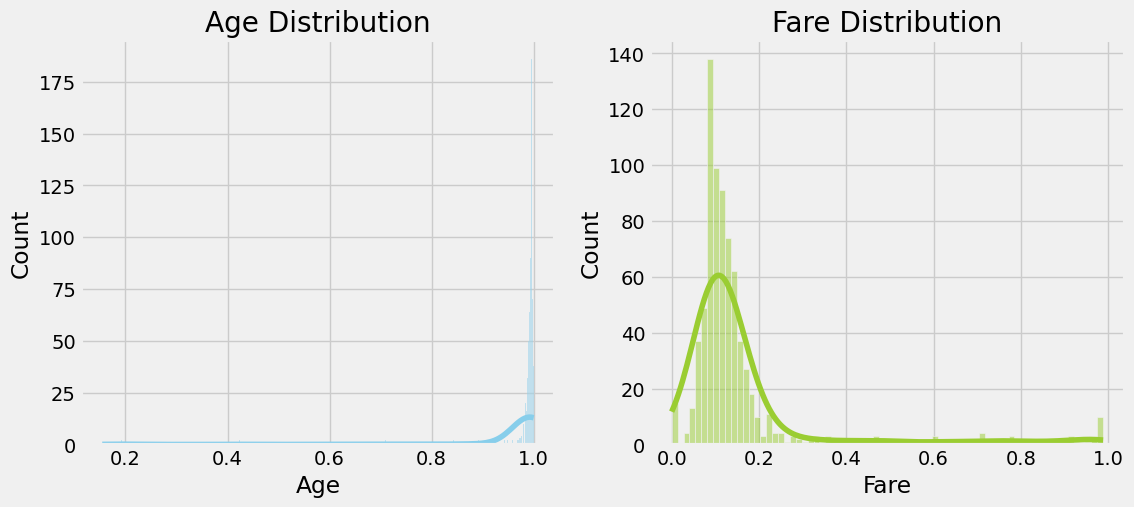

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_normalized['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_normalized['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

In [114]:
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

train['Age'] = standard_scaler.fit_transform(train[['Age']])
train['Fare'] = robust_scaler.fit_transform(train[['Fare']])

test['Age'] = standard_scaler.transform(test[['Age']])
test['Fare'] = robust_scaler.transform(test[['Fare']])

스케일링의 경우에도 test 데이터를 fit 해서는 안됨 > train 데이터에 대해서만 fit 이후에 train 과 test set에 대해 transform
머신러닝 딥러닝 모델이 학습을 하는 과정에서 어떠한 방식으로든 test set 데이터를 사용하게 되어서는 안됩니다.

[방법]

1. train / test(valid) split 먼저 수행
2. train에 대해서 scaling 방법 학습
3. scaling한 train 데이터를 이용하여 모델 학습
4. train 데이터로 학습한 scaling 방법을 이용하여 test(valid) 데이터 scaling
5. scaling한 test(valid) 데이터를 이용하여 모델 학습

[참고](https://www.kaggle.com/code/hiejpaul/c-team-1#5.-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81(Data-Scaling))

Text(0.5, 1.0, 'Fare Distribution(Test)')

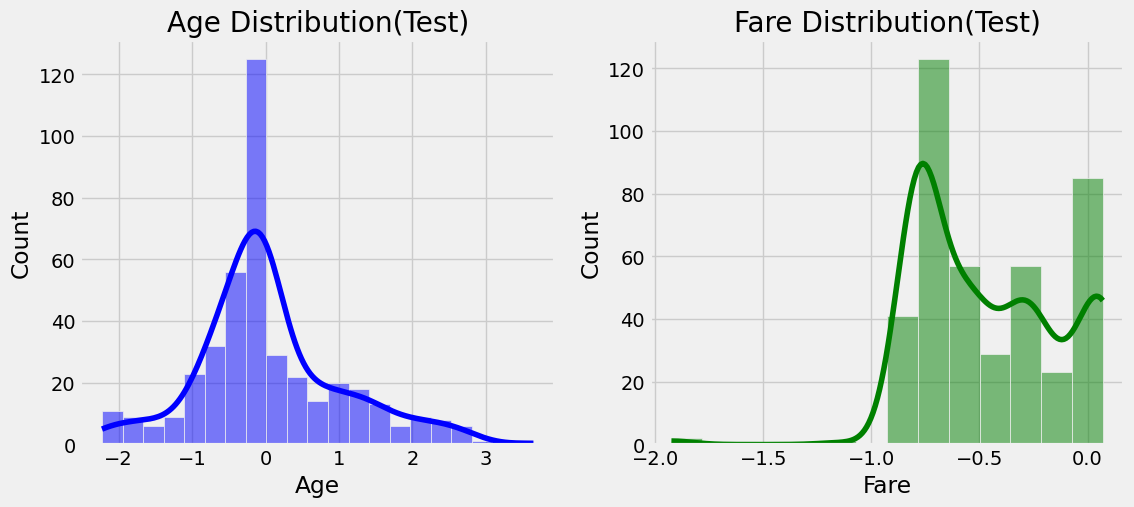

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(test['Age'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Age Distribution(Test)')

sns.histplot(test['Fare'], kde=True, color='green', ax=axes[1])
axes[1].set_title('Fare Distribution(Test)')

# 데이터 분할

In [116]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

selected_features = ['Pclass', 'Age', 'Fare', 'Total_Group', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof']

X = train[selected_features]
y = train['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## 교차검증
교차검증을 하는 이유: 과적합을 피하기 위함.

- 과대적합이란?: 학습 데이터에 과하게 적합한 상태여서 다른 데이터에서는 정확한 예측이 불가한 상태.
- 과소적합이란?: 데이터가 부족하거나 데이터의 특성 자체가 너무 단순해서 기계가 제대로 학습이 되지 않은 상태.
---
- K-Fold: 집합을 체계적으로 바꿔가면서 모든 데이터에 대한 모델의 성과를 검증하는 방식.
- Stratified K-Fold: 불균형한 데이터셋을 위한 K-Fold 방법.

타이타닉 데이터셋은 Survived=1과 0의 비율이 불균형하므로, Stratified K-Fold가 더 적합할 것이다.

In [117]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features = ['Pclass', 'Age', 'Fare', 'Total_Group', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof']

X = train[selected_features]
y = train['Survived']

In [118]:
# Stratified K-Fold
rf = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')

print("Stratified K-Fold 교차검증 점수: ", cv_scores)
print("Stratified K-Fold 평균 교차검증 점수: ", cv_scores.mean())

Stratified K-Fold 교차검증 점수:  [0.78709677 0.80645161 0.83225806 0.8        0.81935484]
Stratified K-Fold 평균 교차검증 점수:  0.8090322580645161


In [119]:
# K-Fold
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("K-Fold 교차검증 점수: ", cv_scores)
print("K-Fold 평균 교차검증 점수: ", cv_scores.mean())

K-Fold 교차검증 점수:  [0.77419355 0.78709677 0.82580645 0.8516129  0.80645161]
K-Fold 평균 교차검증 점수:  0.8090322580645161


# 모델 활용

## 모델 평가 지표

<회귀모델 평가 지표>
- MAE (평균 절대 오차) : 정답값과 예측값의 차이를 절댓값으로 변환한 뒤 합산해 평균을 구함. 특이값이 많은 경우에 주로 사용됨. 값이 낮을수록 좋음.
- MSE (평균 제곱 오차) : 정답값과 예측값의 차이를 제곱한 뒤 평균을 구함. 가장 일반적/직관적. 값이 낮을수록 좋음.
- RMSE (평균 제곱근 오차) : MSE에 루트를 씌운 값. 값이 낮을수록 좋음.
- MAPE (평균 절대 비율 오차) : MAE를 비율, 퍼센트로 표현하여 스케일 의존적 문제를 개선.
- MPE (평균 백분율 오차) : MAPE에서 절댓값을 제외한 지표.

<분류모델 평가 지표>
- 정확도(Accuracy) : 전체 데이터 중에 정확하게 예측한 데이터의 수. 불균형한 데이터의 경우에는 적합하지 않음.
- 오차 행렬(Confusion Matrix) : 분류의 예측 범주와 실제 데이터의 분류 범주를 교차 표 형태로 정리한 행렬.
- 정밀도(Precision) : 분류 모델이 positive로 판정한 것 중, 실제로 positive인 샘플의 비율. positive로 검출된 결과가 얼마나 정확한지 나타냄.
- 재현율(Recall) : 실제 positive 샘플 중 분류 모델이 positive로 판정한 비율. 분류 모델이 실제 positive 클래스를 얼마나 빠지지 않고 잘 잡아내는지 측정함.
- F1-score : 분류 모델의 Precision과 Recall 성능을 동시에 고려해 종합적 평가를 하기 위해해 사용하는 지표로, Precision과 Recall의 조화평균.
- AUC - ROC : 실제 Negative label인 경우 중 모델이 positive로 예측한 비율.
- Precision-recall curve : x축을 recall, y축을 precision으로 하는 커브.


# 예측

### SL(지도학습)-분류


#### Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)
print("Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Logistic Regression Accuracy: 0.7982832618025751
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       151
           1       0.74      0.66      0.70        82

    accuracy                           0.80       233
   macro avg       0.78      0.77      0.77       233
weighted avg       0.79      0.80      0.80       233



#### KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)
print("KNN Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

KNN Accuracy: 0.7682403433476395
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       151
           1       0.69      0.61      0.65        82

    accuracy                           0.77       233
   macro avg       0.75      0.73      0.74       233
weighted avg       0.76      0.77      0.76       233



#### SVC

In [122]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_valid)
print("SVC Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

SVC Accuracy: 0.7982832618025751
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       151
           1       0.75      0.65      0.69        82

    accuracy                           0.80       233
   macro avg       0.78      0.76      0.77       233
weighted avg       0.79      0.80      0.79       233



#### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_valid)
print("Decision Tree Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Decision Tree Accuracy: 0.759656652360515
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.67      0.66        82

    accuracy                           0.76       233
   macro avg       0.74      0.74      0.74       233
weighted avg       0.76      0.76      0.76       233



### 앙상블

#### 스태킹: Stacking Classifier

In [124]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# rf, gbm 스태킹함
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, random_state=42))
]
final_model = LogisticRegression(max_iter=1000, random_state=42)

st = StackingClassifier(estimators=base_models, final_estimator=final_model)
st.fit(X_train, y_train)

y_pred = st.predict(X_valid)
print("Stacking Classifier Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Stacking Classifier Accuracy: 0.8240343347639485
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       151
           1       0.82      0.65      0.72        82

    accuracy                           0.82       233
   macro avg       0.82      0.78      0.80       233
weighted avg       0.82      0.82      0.82       233



#### 배깅: RandomForest

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
print("Random Forest Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Random Forest Accuracy: 0.7939914163090128
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       151
           1       0.74      0.63      0.68        82

    accuracy                           0.79       233
   macro avg       0.78      0.76      0.77       233
weighted avg       0.79      0.79      0.79       233



#### 부스팅

##### GBM

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_valid)
print("GBM Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

GBM Accuracy: 0.8154506437768241
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.77      0.67      0.72        82

    accuracy                           0.82       233
   macro avg       0.80      0.78      0.79       233
weighted avg       0.81      0.82      0.81       233



##### XGBoost

In [127]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_valid)
print("XGBoost Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

XGBoost Accuracy: 0.8454935622317596
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       151
           1       0.85      0.68      0.76        82

    accuracy                           0.85       233
   macro avg       0.85      0.81      0.82       233
weighted avg       0.85      0.85      0.84       233



##### LightGBM

In [128]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_valid)
print("LightGBM Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[LightGBM] [Info] Number of positive: 181, number of negative: 361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 542, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333948 -> initscore=-0.690381
[LightGBM] [Info] Start training from score -0.690381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


##### AdaBoost

In [129]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_valid)
print("AdaBoost Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

AdaBoost Accuracy: 0.8111587982832618
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.76      0.67      0.71        82

    accuracy                           0.81       233
   macro avg       0.80      0.78      0.79       233
weighted avg       0.81      0.81      0.81       233



## 과적합 방지: 정규화(Regulation)
- L1 정규화(Lasso): 설명력에 기여하지 못하는 독립변수의 회귀계수를 0으로 만듦
- L2 정규화(Ridge): 모델의 설명력에 기여하지 못하는 독립변수의 회귀계수 크기를 0에 근접하도록 축소
- 엘라스틱 넷(Elastic Net): 릿지와 라쏘의 결합. 즉 L1-norm 과 L2-norm을 모두 이용하여 패널티를 부과하여 회귀모델을 생성.

In [130]:
from sklearn.linear_model import RidgeClassifier, Lasso

### L1 정규화(Lasso)

In [131]:
# L1 정규화 적용 (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_valid)
print("L1-Regularized Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

L1-Regularized Logistic Regression Accuracy: 0.7982832618025751
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       151
           1       0.74      0.66      0.70        82

    accuracy                           0.80       233
   macro avg       0.78      0.77      0.77       233
weighted avg       0.79      0.80      0.80       233



### L2 정규화(Ridge)

In [132]:
# L2 정규화 적용 (Ridge)
ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_valid)
print("L2-Regularized Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

L2-Regularized Logistic Regression Accuracy: 0.8025751072961373
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       151
           1       0.75      0.66      0.70        82

    accuracy                           0.80       233
   macro avg       0.79      0.77      0.78       233
weighted avg       0.80      0.80      0.80       233



### Elastic Net(L1+L2)

In [133]:
# Elastic Net (L1 + L2 정규화) 적용
en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000, random_state=42)
en.fit(X_train, y_train)

y_pred = en.predict(X_valid)
print("Elastic Net Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Elastic Net Logistic Regression Accuracy: 0.7939914163090128
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       151
           1       0.73      0.66      0.69        82

    accuracy                           0.79       233
   macro avg       0.78      0.76      0.77       233
weighted avg       0.79      0.79      0.79       233



# 모델 성능 개선: 하이퍼파라미터 튜닝

In [134]:
# 캐글 타이타닉 평가지표: Accuracy
print('모델별 Accuracy 비교')
print("lr:", accuracy_score(y_valid, lr.predict(X_valid)))
print("knn:", accuracy_score(y_valid, knn.predict(X_valid)))
print("svc:", accuracy_score(y_valid, svc.predict(X_valid)))
print("dt:", accuracy_score(y_valid, dt.predict(X_valid)))
print("st:", accuracy_score(y_valid, st.predict(X_valid)))
print("rf:", accuracy_score(y_valid, rf.predict(X_valid)))
print("gbm:", accuracy_score(y_valid, gbm.predict(X_valid)))
print("xgb:", accuracy_score(y_valid, xgb.predict(X_valid)))
print("lgbm:", accuracy_score(y_valid, lgbm.predict(X_valid)))
print("ada:", accuracy_score(y_valid, ada.predict(X_valid)))
print("ridge:", accuracy_score(y_valid, ridge.predict(X_valid)))
print("lasso:", accuracy_score(y_valid, lasso.predict(X_valid)))
print("en:", accuracy_score(y_valid, en.predict(X_valid)))

모델별 Accuracy 비교
lr: 0.7982832618025751
knn: 0.7682403433476395
svc: 0.7982832618025751
dt: 0.759656652360515
st: 0.8240343347639485
rf: 0.7939914163090128
gbm: 0.8154506437768241
xgb: 0.8454935622317596
lgbm: 0.8283261802575107
ada: 0.8111587982832618
ridge: 0.8025751072961373
lasso: 0.7982832618025751
en: 0.7939914163090128


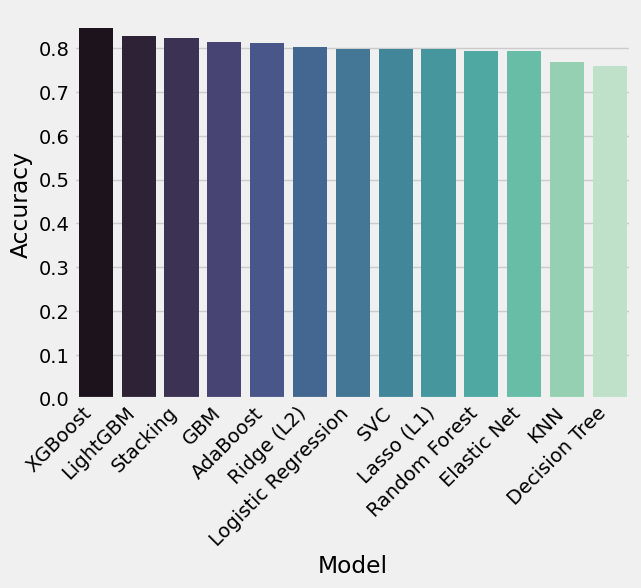

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_results = {
    "Logistic Regression": accuracy_score(y_valid, lr.predict(X_valid)),
    "KNN": accuracy_score(y_valid, knn.predict(X_valid)),
    "SVC": accuracy_score(y_valid, svc.predict(X_valid)),
    "Decision Tree": accuracy_score(y_valid, dt.predict(X_valid)),
    "Stacking": accuracy_score(y_valid, st.predict(X_valid)),
    "Random Forest": accuracy_score(y_valid, rf.predict(X_valid)),
    "GBM": accuracy_score(y_valid, gbm.predict(X_valid)),
    "XGBoost": accuracy_score(y_valid, xgb.predict(X_valid)),
    "LightGBM": accuracy_score(y_valid, lgbm.predict(X_valid)),
    "AdaBoost": accuracy_score(y_valid, ada.predict(X_valid)),
    "Lasso (L1)": accuracy_score(y_valid, lasso.predict(X_valid)),
    "Ridge (L2)": accuracy_score(y_valid, ridge.predict(X_valid)),
    "Elastic Net": accuracy_score(y_valid, en.predict(X_valid))
}

accuracy_df = pd.DataFrame(accuracy_results.items(), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.show()

## Grid Search
- 가능한 모든 조합의 하이퍼파라미터로 훈련시켜서 최적의 조합을 찾음.
- 범위를 지정해주어야 함.
- 모든 하이퍼파라미터 후보들에 대한 일반화 성능을 확인하기 때문에 시간이 오래 걸림.

In [136]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.8438709677419354


## Random Search
- 경계 내에서 임의의 조합을 추출하여 최적의 조합을 찾는 방법, 빠름.
- 특히 적은 수의 하이퍼파라미터가 모델 성능의 영향을 미치는 경우에 좋은 결과를 낸다.
- GridSearch에 비해 시간은 적게 걸리지만, 말 그대로 "랜덤"하게 몇 개만 뽑아서 확인해보는 식이라 정확도가 다소 떨어질 수 있음.

In [138]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(3, 10, 2)
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.052222222222222225}
Best Accuracy: 0.8413693510023785


## Bayesian Optimization
- 목적함수와 하이퍼파라미터의 조합을 대상으로 Surrogate model을 만들어 평가하고 Acquisition Function이 다음 인풋으로 사용할 조합을 추천하는 과정을 반복하면서 순차적으로 업데이트하여 최적의 조합을 찾아낸다.
- 사전 정보를 최적값 탐색에 반영.

In [139]:
# pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.4 MB/s eta 0:00:00


In [142]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    model = XGBClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Accuracy:", study.best_value)

[I 2025-03-18 06:36:32,481] A new study created in memory with name: no-name-1c5ad416-c443-4cd6-8716-2363fd0bf92f
[I 2025-03-18 06:36:33,058] Trial 0 finished with value: 0.8377166156982672 and parameters: {'learning_rate': 0.011435536597067109, 'n_estimators': 149, 'max_depth': 4}. Best is trial 0 with value: 0.8377166156982672.
[I 2025-03-18 06:36:33,802] Trial 1 finished with value: 0.8358817533129461 and parameters: {'learning_rate': 0.13862332996447319, 'n_estimators': 293, 'max_depth': 3}. Best is trial 0 with value: 0.8377166156982672.
[I 2025-03-18 06:36:34,384] Trial 2 finished with value: 0.8266224940536867 and parameters: {'learning_rate': 0.013525245416307416, 'n_estimators': 104, 'max_depth': 9}. Best is trial 0 with value: 0.8377166156982672.
[I 2025-03-18 06:36:35,310] Trial 3 finished with value: 0.8358817533129461 and parameters: {'learning_rate': 0.08181498945619185, 'n_estimators': 233, 'max_depth': 8}. Best is trial 0 with value: 0.8377166156982672.
[I 2025-03-18 06

Best Params: {'learning_rate': 0.022187123082860073, 'n_estimators': 293, 'max_depth': 5}
Best Accuracy: 0.8469249065579341


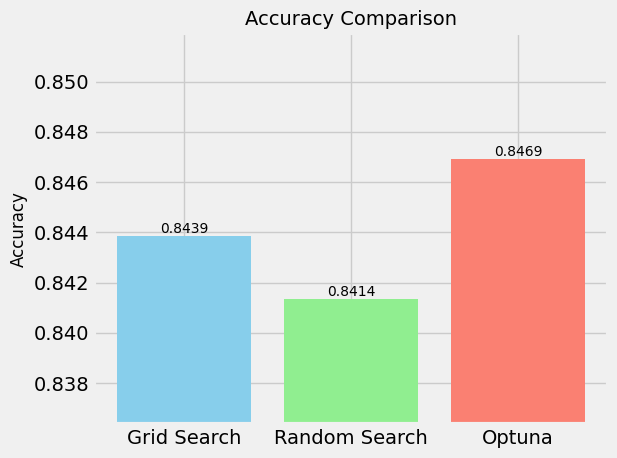

In [143]:
grid_acc = grid_search.best_score_
random_acc = random_search.best_score_
optuna_acc = study.best_value

methods = ['Grid Search', 'Random Search', 'Optuna']
accuracies = [grid_acc, random_acc, optuna_acc]

plt.bar(methods, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

plt.ylim(min(accuracies) - 0.005, max(accuracies) + 0.005)
plt.tight_layout()
plt.show()

# 모델 저장

## XGBoost
- Public Score: 0.77033

In [146]:
best_params = study.best_params

best_xgb_model = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [148]:
best_xgb_model.fit(X_train, y_train)

X_test = test[X_train.columns]
y_test_pred_xgb = best_xgb_model.predict(X_test)

In [150]:
submission_path_xgb = "/content/drive/MyDrive/titanic/titanic/asset/result/submission_ndnb.csv"

submit["Survived"] = y_test_pred_xgb

submit.to_csv(submission_path_xgb, index=False)

In [151]:
submit['Survived'].value_counts()

,count
Survived,
0,276
1,142
